**Import packages and Dataset**

In [3]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the dataset
# Use pathlib to ensure the file path works across all environments (Windows, macOS, Linux)
data_path = Path('data/bank-additional-full.csv')
df = pd.read_csv(data_path, sep=';')

# Check the head of df
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Initial EDA**

In [4]:
# Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The datset is consist of 5 flot64, 5 int64 and 11 object. Data types seem to be consistant.

In [5]:
# Check duplicates
df.duplicated().sum()

12

In [6]:
# Check the duplicated row
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married       

It's difficult to determine whether these rows are duplicates or legitimate data without domain knowledge. Duplicates are only 12 and this dataset has 41188 rows. So I decided to keep it.

In [7]:
# Check for inconsistent categorical data
for col in df.select_dtypes(include='object').columns:
    print(f'{col}: {df[col].unique()}')

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


The entries of categorical values seem to be consistant. But there are values 'unknown'. This value could have affect on the performances of the models. Let's investigate this.

In [8]:
# count 'unknown' values in each column
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {(df[col] == 'unknown').sum()}")

job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0


There are lots of entries of unknowns. So For now, I'm going to keep it and if necessary, later, I'm going to deal with it.

In [9]:
# Check the unique value of the target
df['y'].unique()

array(['no', 'yes'], dtype=object)

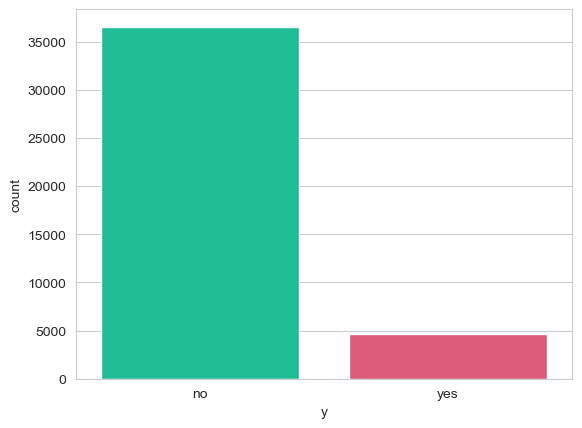

In [10]:
# Check the counts of the target 
# Define the color palette
palette_1 = ['#06d6a0', '#ef476f']

# Define the global setting
sns.set_style('whitegrid')

# Plot the countplot
sns.countplot(data=df, x='y', hue='y', palette=palette_1)
plt.show()

In [11]:
# Check the percentage of the class percentages in the target
c_percentages = df['y'].value_counts(normalize=True)
print(c_percentages)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


The positive class makes up only about 10% of the dataset, indicating a class imbalance. 

**EDA of the numeric features**

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


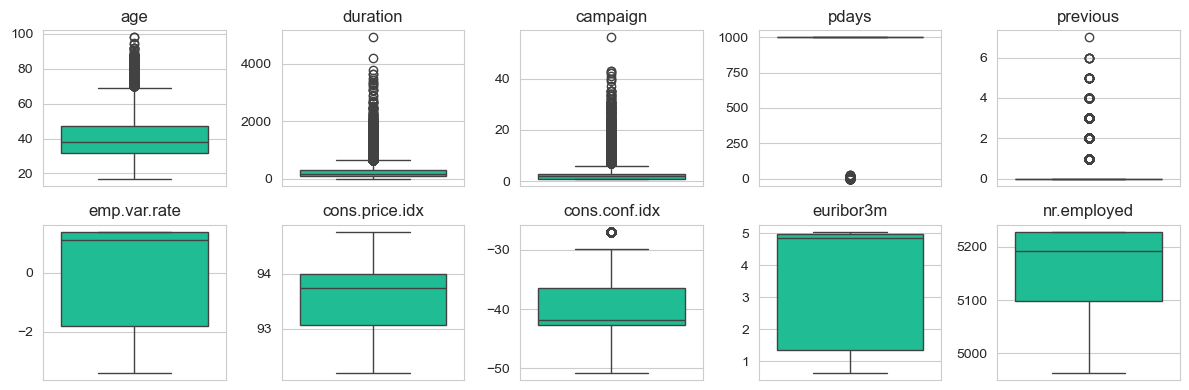

In [13]:
# Check outliers
# Import math.ceil to define the row of the grid layout
import math

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a grid layout
fig, axes = plt.subplots(nrows=(math.ceil(len(num_cols)/5)), ncols=5, figsize=(12,4))

# Plot box plots
for i, col in enumerate(num_cols):
    # Compute row and column index
    row_idx = i // 5
    col_idx = i %  5

    # Create box plots
    sns.boxplot(y=df[col], ax=axes[row_idx][col_idx], color=palette_1[0])
    axes[row_idx][col_idx].set_title(f'{col}')
    axes[row_idx][col_idx].set_ylabel('')

plt.tight_layout()
plt.show()

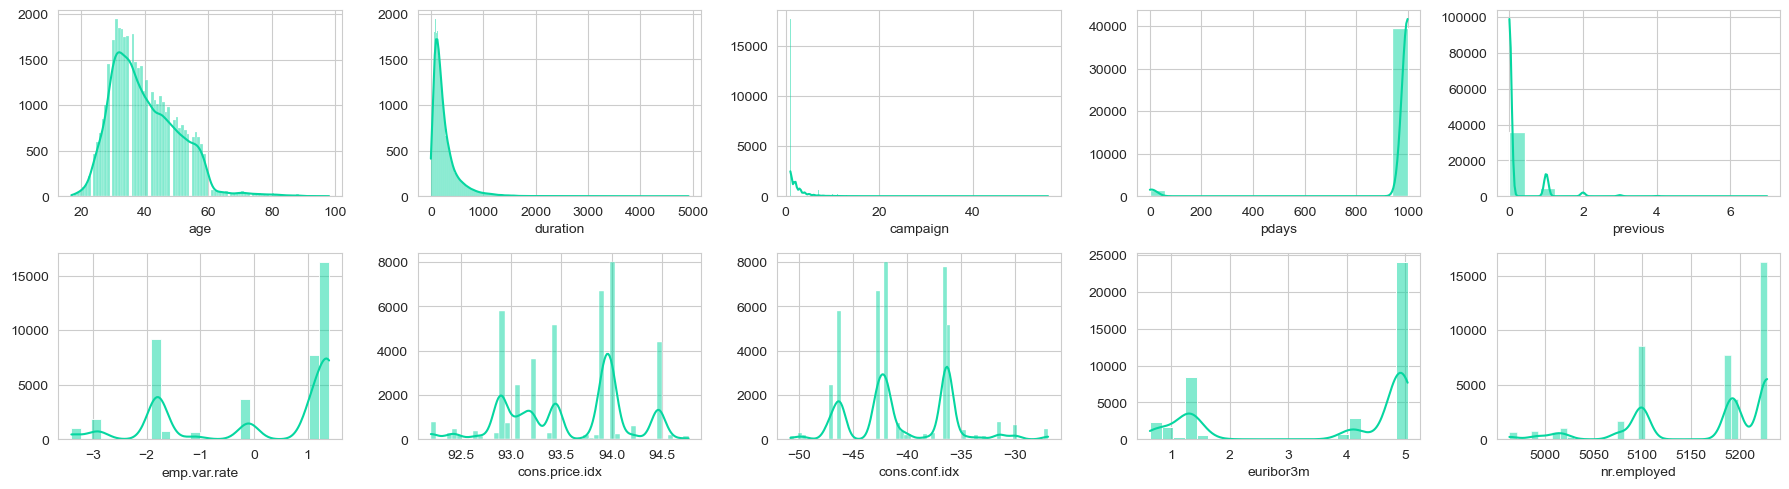

In [14]:
# Plot histograms of the features
# Create a grid layout
fig, axes = plt.subplots(2, 5, figsize = (18, 5))

for i, col in enumerate(num_cols):
    # Compute indexes for subplots
    row_idx = i // 5
    col_idx = i % 5

    # Create histplot
    sns.histplot(data=df, x=col, kde=True, ax = axes[row_idx][col_idx], color=palette_1[0])
    axes[row_idx][col_idx].set_ylabel('')

plt.tight_layout()
plt.show()

Some distributions seem to have extreme values and it could have some correrlation with the minor class. Let's investigate it.

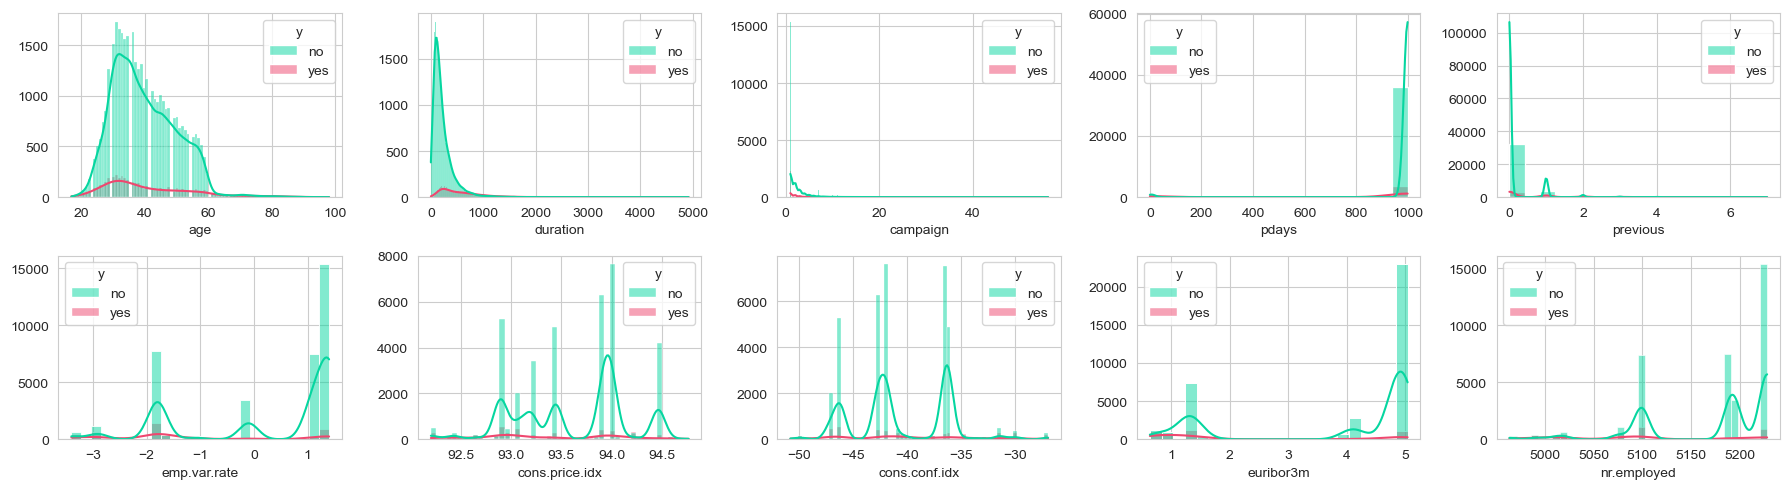

In [15]:
# Plot histograms of the features
# Create a grid layout
fig, axes = plt.subplots(2, 5, figsize = (18, 5))

for i, col in enumerate(num_cols):
    # Compute indexes for subplots
    row_idx = i // 5
    col_idx = i % 5

    # Create histplot + add hue
    sns.histplot(data=df, x=col, kde=True, ax = axes[row_idx][col_idx], hue='y', palette=palette_1)
    axes[row_idx][col_idx].set_ylabel('')

plt.tight_layout()
plt.show()

It doesn't seem like there are massive distirbutions differences between the minor and positive class. Some numerical features are higly skwed.

Let's check correlation of the dataset

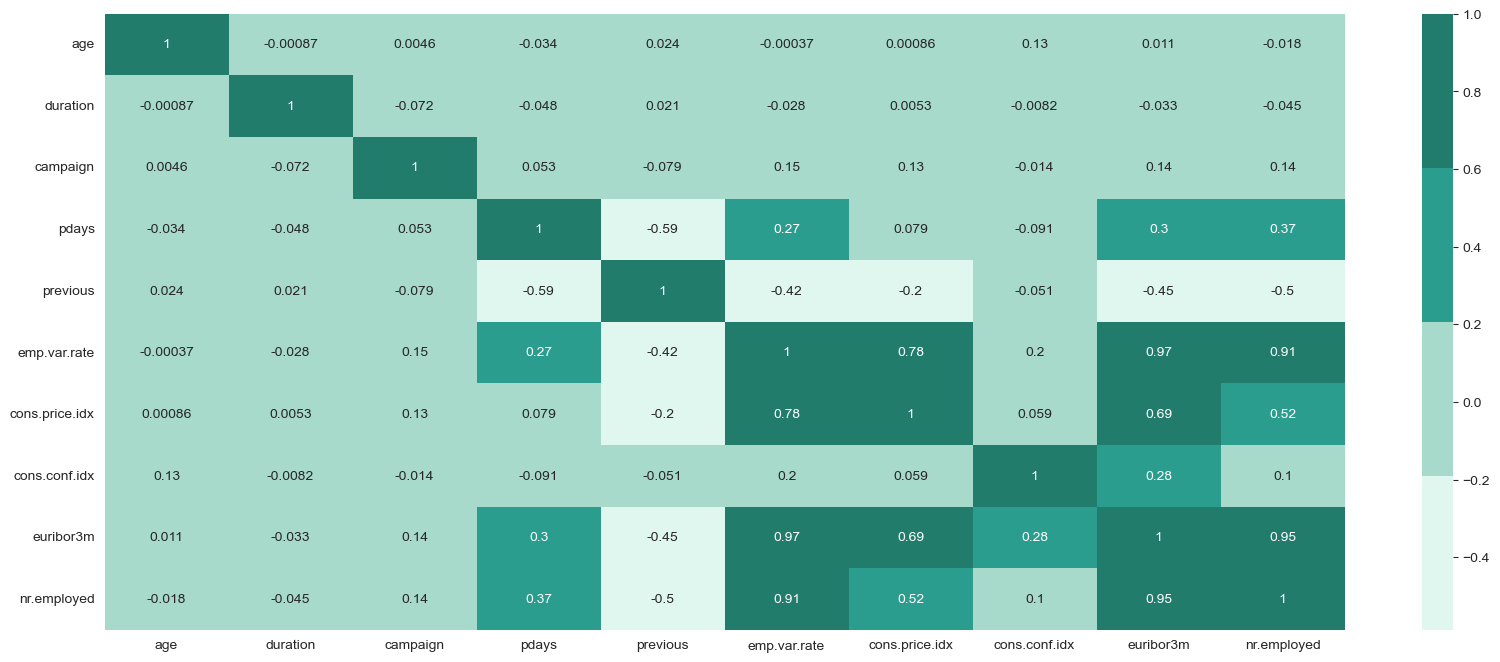

In [16]:
# Draw the heatmap
# Create a custom cmap color
# Import a package
import matplotlib.colors as mcolors

# Define the color
palette_2 = ['#e0f7ef',  '#a8dacc', '#2a9d8f','#227c6c',]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_palette', palette_2)

plt.figure(figsize = (20, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap=palette_2)
plt.show()


The dataset appears to be clean, so I will now explore strategies to address this imbalance. Additionally, some numerical variables contain outliers. However, I have decided to retain them for now, as the positive class is a rare event in this dataset, and these outliers might serve as important predictors.

**EDA to examine class separation and determine how to address the class imbalance**

Conduct PCA to examine whether there is a linear separation or not

In [17]:
# Make a copy of the dataset to avoid data leakage
df_eda = df.copy()

df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
# Import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop the target
# Drop the duration column as well to avoid data leakage
X_eda = df_eda.drop(columns=['y', 'duration'])
y_eda = df_eda['y']

# Encode the categorical values to numerical
X_eda_dummy = pd.get_dummies(X_eda, drop_first=True)
y_eda_encoded = y_eda.map({'no': 0, 'yes': 1})

# Check features are encoded correctly
X_eda_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_blue-collar                41188 non-null  bool   
 10  job_entrepreneur               41188 non-null  bool   
 11  job_housemaid                  41188 non-null  bool   
 12  job_management                 41188 non-null 

In [19]:
# Check whether the target are encoded correctly or not
y_eda_encoded.unique()

array([0, 1], dtype=int64)

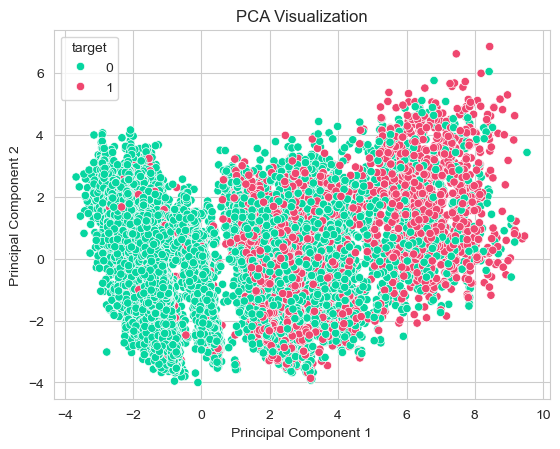

In [20]:
# Scale all feature
scaler = StandardScaler()
X_eda_scaled = scaler.fit_transform(X_eda_dummy)

# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_eda_scaled)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y_eda_encoded

# Plot PCA
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette=palette_1)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

It doesn't look like there are clear linear separationa between targets classes.

**Conduct LDA to examine linear separations from another angle**

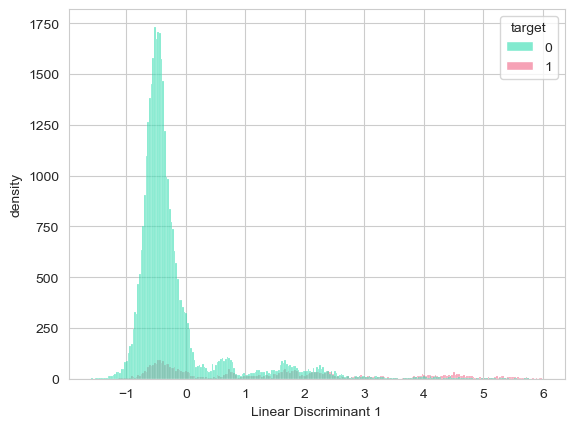

In [21]:
# Import a necessary library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_eda_scaled, y_eda_encoded)

# Create a DataFrame for plotting
df_lda = pd.DataFrame(X_lda, columns=['LD1'])
df_lda['target'] = y_eda_encoded

# Plot LDA
sns.histplot(data=df_lda, x='LD1', hue='target', palette=palette_1)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('density')
plt.show()

It doesn't look like there are clear linear separationa between targets classes with LDA too.

**Conduct UMAP to examine non linear separatino**

c:\Users\theeg\anaconda3\envs\mlproject\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


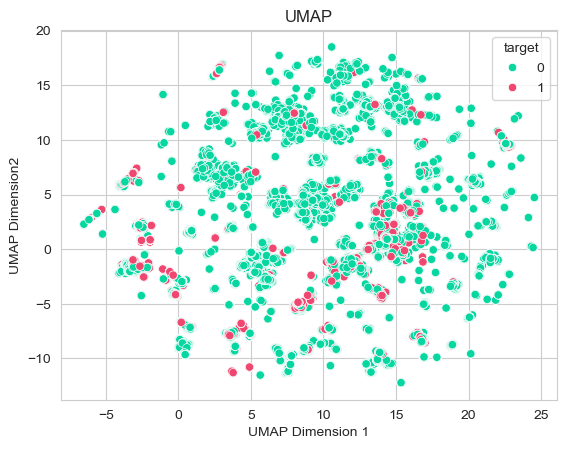

In [22]:
# Import the library
import umap.umap_ as umap

# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_eda_scaled)

# Create a DataFrame for plotting
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['target'] = y_eda_encoded

# Plot UMAP
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='target', palette=palette_1)
plt.title('UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension2')
plt.show()

It doesn't seem like there are non linear spearations with this UMAP.

Based on visualizatin from PCA, LDA and UMAP, there does not appear to be strong linear or nonlinear separation in this dataset.

Therefore, I will initially avoid oversampling because it could add more noise without improving the model performance.

Instead of that, I'm going to try other methods and if it works poorly, I will revisit oversampling methods because visualizations don't show all the features about this dataset although those are insightsful.


**Building the base modes without oversampling methods**

In [23]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import RobustScaler


# Create a copy of df and work on the copy to build models
df_model = df.copy()
df_model['y'] = df_model['y'].map({'no': 0, 'yes': 1})

# Split features and target
# Drop the duration columns as well to avoid data leakage
X = df_model.drop(columns=['y', 'duration'])
y = df_model['y']

# Check the info of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [24]:
# Check the values on y
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [25]:
# Identify the categorical and numerical columns
cat_cols_model = X.select_dtypes(include='object').columns
num_cols_model = X.select_dtypes(exclude='object').columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Define preprocessing steps
# With linear model drop first to avoid multicollinearity
# Since there are lots of outliers use Robust scaler
linear_preprocessor = ColumnTransformer([
    ('num', RobustScaler(), num_cols_model),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols_model)
])

# Tree_based models don't need scaling 
# Do one hot encoding without dropping first feature because it's not linear models
tree_preprocessor = ColumnTransformer([
    ('num','passthrough', num_cols_model),
    ('cat', OneHotEncoder(drop=None, handle_unknown='ignore'), cat_cols_model)
])

**First, I just run the model without oversampling or balancing the wights since minor classes has more than 4000 data points and I'm going to use it as a base model.**

In [26]:
# Define the base models
base_models ={
    'Logistic Regression': Pipeline([
        ('preprocessing', linear_preprocessor),
        ('model', LogisticRegression(solver='saga',tol=1e-3, n_jobs=-1, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessing', linear_preprocessor),
        ('model', LinearSVC(tol = 1e-3, random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessing', tree_preprocessor),
        ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
    ]),
    'XGBoost': Pipeline([
        ('preprocessing', tree_preprocessor),
        ('model', XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1))
    ])
    
}

# Create an empty list to save the cv scores
cv_results_base = []

# Set StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate CV score and append scores to the list
for name, model in base_models.items():
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()
    cv_results_base.append({
        'Model': name,
        'Type': 'Base',
        'F1_Score': f1,
    })

In [27]:
# Convert the list to a DataFrame
results_df= pd.DataFrame(cv_results_base)
results_df

,Model,Type,F1_Score
0,Logistic Regression,Base,0.310206
1,SVM,Base,0.273432
2,Random Forest,Base,0.362800
3,XGBoost,Base,0.374902


C:\Users\theeg\AppData\Local\Temp\ipykernel_30088\903536364.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=results_df, x='Model', y='F1_Score', color=palette_1[0], ci=None)


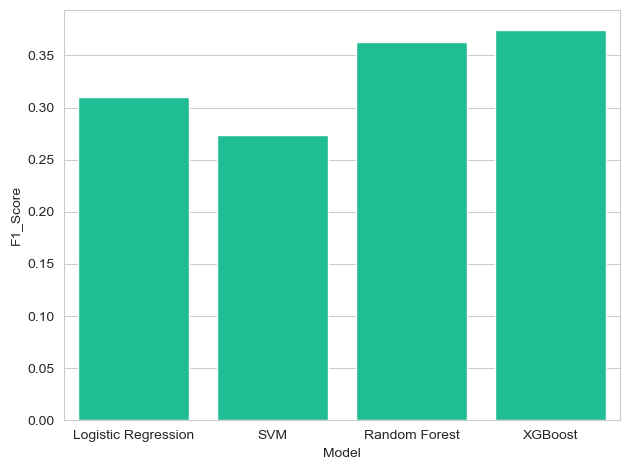

In [28]:
# Plot F1 Score
sns.barplot(data=results_df, x='Model', y='F1_Score', color=palette_1[0], ci=None)

plt.tight_layout()
plt.show()

**Use balanced weght instead of using oversampling**

In [29]:
# Import counter to help XGBoos to balance class imbalance
from collections import Counter

# Compute imbalance ratio
counter = Counter(y_train)
print(counter)
XG_scale_weight = counter[0] / counter[1]

Counter({0: 25583, 1: 3248})


In [30]:

# Define the balanced models
balanced_models ={
    'Logistic Regression': Pipeline([
        ('preprocessing', linear_preprocessor),
        ('model', LogisticRegression(class_weight='balanced', solver='saga', tol=1e-3, n_jobs=-1, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessing', linear_preprocessor),
        ('model', LinearSVC(class_weight='balanced', tol=1e-3, random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessing', tree_preprocessor),
        ('model', RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
    ]),
    'XGBoost': Pipeline([
        ('preprocessing', tree_preprocessor),
        ('model', XGBClassifier(eval_metric='logloss', scale_pos_weight=XG_scale_weight, random_state=42, n_jobs=1))
    ])
    
}

# Create an empty list to save the cv scores
cv_results_balanced = []

# Calculate CV score and append scores to the list
for name, model in balanced_models.items():
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()
    cv_results_balanced.append({
        'Model': name,
        'Type': 'balanced',
        'F1_Score': f1,
    })

In [31]:
# Convert the list to a DataFrame
results_df_balanced = pd.DataFrame(cv_results_balanced)

# Concatenating the DataFrame to results_df
# After concatenation, remove potential duplicate rows to keep the DataFrame clean (e.g., when you accidentally run this cell twice)
results_df = pd.concat([results_df, results_df_balanced], ignore_index = True)
results_df = results_df.drop_duplicates()
results_df


,Model,Type,F1_Score
0,Logistic Regression,Base,0.310206
1,SVM,Base,0.273432
2,Random Forest,Base,0.362800
3,XGBoost,Base,0.374902
4,Logistic Regression,balanced,0.372052
5,SVM,balanced,0.451117
6,Random Forest,balanced,0.349071
7,XGBoost,balanced,0.429441


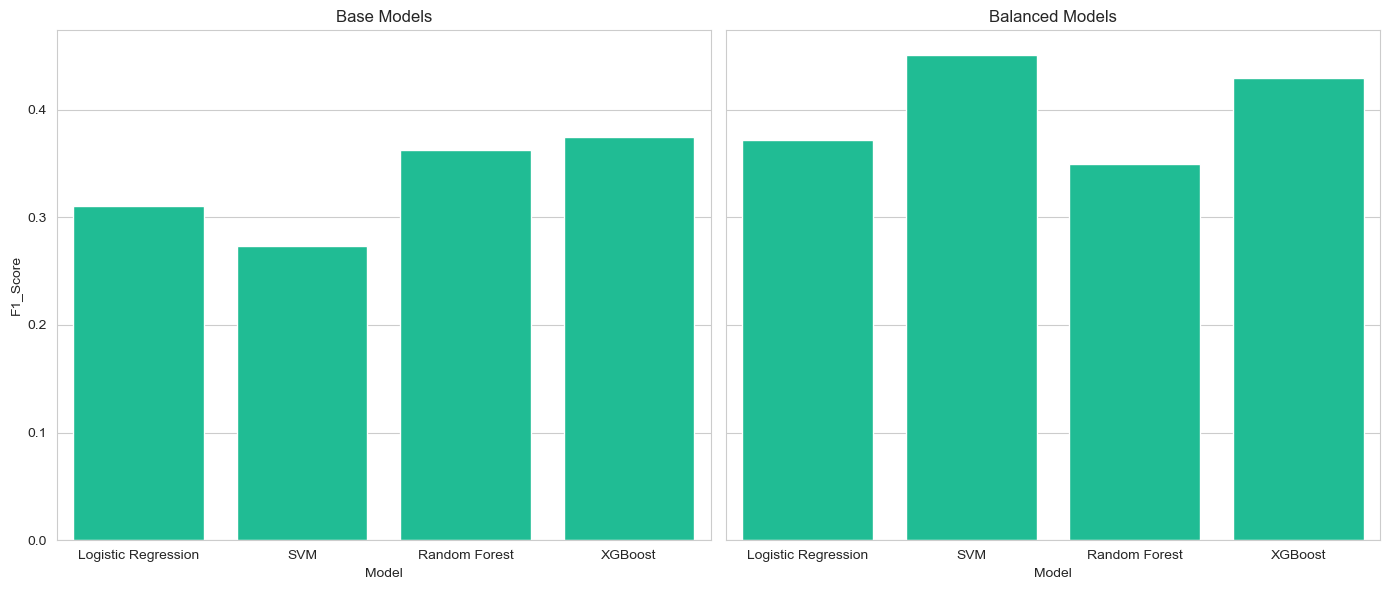

In [32]:
# Plot F1 Scores
# set the figure size and create two subplots to compare the scores
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for the base scores
sns.barplot(data=results_df[results_df['Type']=='Base'], x='Model', y='F1_Score', ax=axes[0], color=palette_1[0])
axes[0].set_title('Base Models')


# Plot fir the bakanced socres
sns.barplot(data=results_df[results_df['Type']=='balanced'], x='Model', y='F1_Score', ax=axes[1], color=palette_1[0])
axes[1].set_title('Balanced Models')

# Set the layout and plot the graph
plt.tight_layout()
plt.show()

In [33]:
# Import libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Imbpipeline

In [34]:
smote_models ={
    'Logistic Regression': Imbpipeline([
        ('preprocessing', linear_preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(solver='saga', tol=1e-3, n_jobs=-1, random_state=42))
    ]),
    'SVM': Imbpipeline([
        ('preprocessing', linear_preprocessor),
         ('smote', SMOTE(random_state=42)),
        ('model', LinearSVC(tol=1e-3, random_state=42))
    ]),
    'Random Forest': Imbpipeline([
        ('preprocessing', tree_preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
    ]),
    'XGBoost': Imbpipeline([
        ('preprocessing', tree_preprocessor),
         ('smote', SMOTE(random_state=42)),
        ('model', XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1))
    ])
    
}

# Create an empty list to save the cv scores
cv_results_smote = []

# Calculate CV score and append scores to the list
for name, model in smote_models.items():
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()
    cv_results_smote.append({
        'Model': name,
        'Type': 'SMOTE',
        'F1_Score': f1,
    })

In [35]:
# Convert the list to a DataFrame
results_df_smote = pd.DataFrame(cv_results_smote)

# Concatenate the DataFrame to results_df and remove potential duplicate
results_df = pd.concat([results_df, results_df_smote], ignore_index=True)
results_df = results_df.drop_duplicates()
results_df

,Model,Type,F1_Score
0,Logistic Regression,Base,0.310206
1,SVM,Base,0.273432
2,Random Forest,Base,0.362800
3,XGBoost,Base,0.374902
4,Logistic Regression,balanced,0.372052
5,SVM,balanced,0.451117
6,Random Forest,balanced,0.349071
7,XGBoost,balanced,0.429441
8,Logistic Regression,SMOTE,0.383609
9,SVM,SMOTE,0.417530


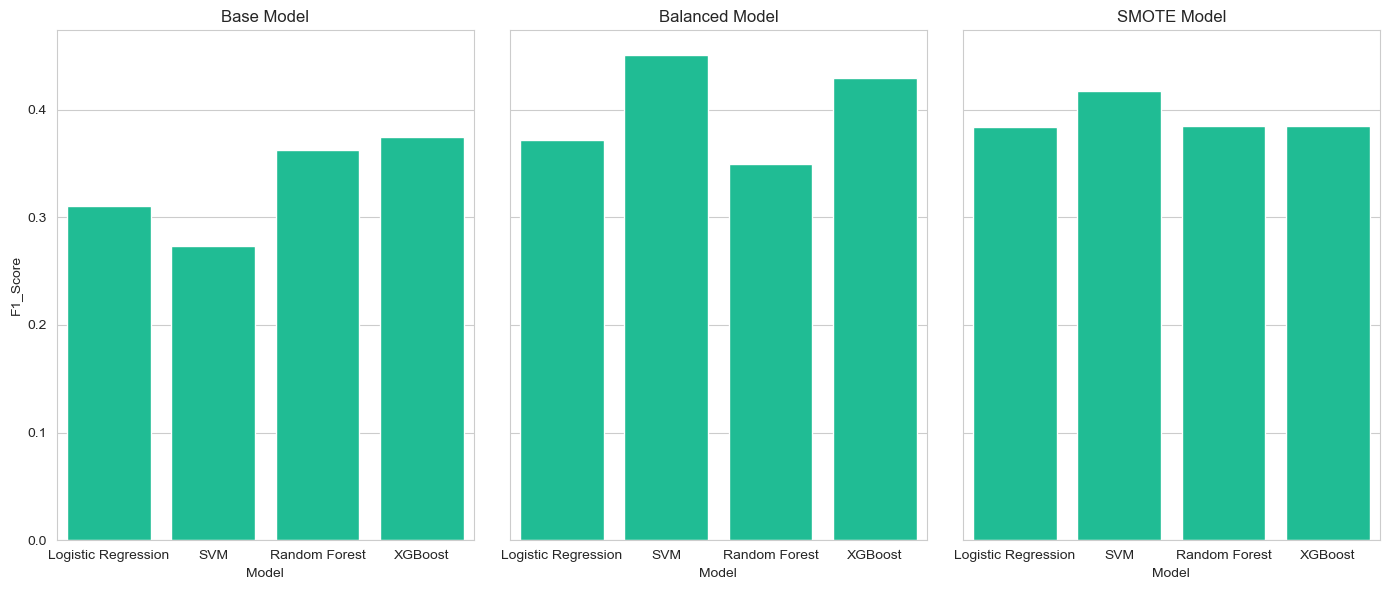

In [36]:
# Plot F1 Score
# Create subplots and set the figsize
fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharey=True)

# plot the base plot
sns.barplot(data=results_df[results_df['Type']=='Base'], x='Model', y='F1_Score', ax=axes[0], color=palette_1[0])
axes[0].set_title('Base Model')

# Plot the balanced model
sns.barplot(data=results_df[results_df['Type']=='balanced'], x='Model', y='F1_Score', ax=axes[1], color=palette_1[0])
axes[1].set_title('Balanced Model')

# Plot the Smote model
sns.barplot(data=results_df[results_df['Type']=='SMOTE'], x='Model', y='F1_Score', ax=axes[2], color=palette_1[0])
axes[2].set_title('SMOTE Model')

# Adjust the layout and plot the graph
plt.tight_layout()
plt.show()


**The following models are promising. I'm going to tweek those models and exmine them.
Weight Balanced: LR, SVM and XGBoost
SMOTE: LR, SVM**

In [37]:
# Remove correlated features and try Linear models again
# Create the preprocessor for feature selection
from feature_engine.selection import SmartCorrelatedSelection
smart_corr_sel = SmartCorrelatedSelection(
    method='pearson',
    threshold=0.8,
    selection_method='variance',
    missing_values='ignore'
)

# Feature engine doesn't support sparse outputs. So modify the preprocessor.
linear_preprocessor_corr = ColumnTransformer([
    ('num', RobustScaler(), num_cols_model),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols_model)
])
smote_models_corr ={
    'Logistic Regression': Imbpipeline([
        ('preprocessing', linear_preprocessor_corr),
        ('smote', SMOTE(random_state=42)),
        ('select_corr', smart_corr_sel),
        ('model', LogisticRegression(solver='saga', tol=1e-3, n_jobs=-1, random_state=42))
    ]),
    'SVM': Imbpipeline([
        ('preprocessing', linear_preprocessor_corr),
        ('smote', SMOTE(random_state=42)),
        ('select_corr', smart_corr_sel),
        ('model', LinearSVC(tol=1e-3, random_state=42))
    ])    
}

# Create an empty list to save the cv scores
cv_results_smote_corr = []

# Calculate CV score and append scores to the list
for name, model in smote_models_corr.items():
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()
    cv_results_smote_corr.append({
        'Model': name,
        'Type': 'SMOTE_corr',
        'F1_Score': f1,
    })

In [38]:
# Convert the list to a DataFrame
results_df_smote_corr = pd.DataFrame(cv_results_smote_corr)

# Concatenate the it to results_df and remove potential duplicates
results_df = pd.concat([results_df, results_df_smote_corr], ignore_index = True)
results_df = results_df.drop_duplicates()
results_df

,Model,Type,F1_Score
0,Logistic Regression,Base,0.310206
1,SVM,Base,0.273432
2,Random Forest,Base,0.362800
3,XGBoost,Base,0.374902
4,Logistic Regression,balanced,0.372052
5,SVM,balanced,0.451117
6,Random Forest,balanced,0.349071
7,XGBoost,balanced,0.429441
8,Logistic Regression,SMOTE,0.383609
9,SVM,SMOTE,0.417530


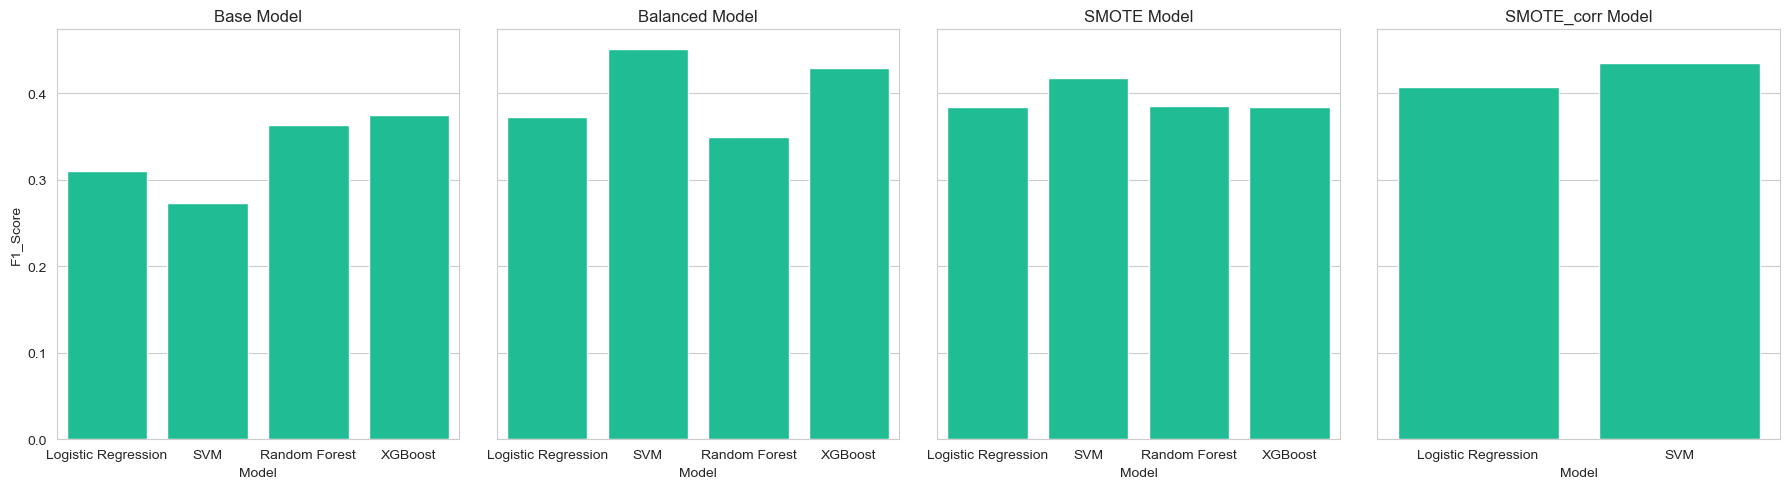

In [39]:
# Plot F1 Scores
# Create subplots and set figsize
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

# Plot the base models
sns.barplot(data=results_df[results_df['Type']=='Base'], x='Model', y='F1_Score', ax=axes[0], color=palette_1[0])
axes[0].set_title('Base Model')

# Plot the balanced models
sns.barplot(data=results_df[results_df['Type']=='balanced'], x='Model', y='F1_Score', ax=axes[1], color=palette_1[0])
axes[1].set_title('Balanced Model')

# Plot the Smote models
sns.barplot(data=results_df[results_df['Type']=='SMOTE'], x='Model', y='F1_Score', ax=axes[2], color=palette_1[0])
axes[2].set_title('SMOTE Model')

# Plot the Smore_corr models
sns.barplot(data=results_df[results_df['Type']=='SMOTE_corr'], x='Model', y='F1_Score', ax=axes[3], color=palette_1[0])
axes[3].set_title('SMOTE_corr Model')

# Adjust the layout and plot the graph
plt.tight_layout()
plt.show()

In [40]:
# Try weight balanced model as well
balanced_models_corr ={
    'Logistic Regression': Pipeline([
        ('preprocessing', linear_preprocessor_corr),
        ('select_corr', smart_corr_sel),
        ('model', LogisticRegression(class_weight='balanced',  solver='saga', tol=1e-3, n_jobs=-1, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessing', linear_preprocessor_corr),
        ('select_corr', smart_corr_sel),
        ('model', LinearSVC(class_weight='balanced', tol=1e-3, random_state=42))
    ])    
}

# Create an empty list to save the cv scores
cv_results_balanced_models_corr = []

# Calculate CV score and append scores to the list
for name, model in balanced_models_corr.items():
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()
    cv_results_balanced_models_corr.append({
        'Model': name,
        'Type': 'balanced_corr',
        'F1_Score': f1,
    })

In [41]:
# Convert the list to a DataFrame
results_df_balanced_models_corr = pd.DataFrame(cv_results_balanced_models_corr)

#Concatenate it to results_df and remove potential duplicates
results_df = pd.concat([results_df, results_df_balanced_models_corr], ignore_index=True)
results_df = results_df.drop_duplicates()

results_df

,Model,Type,F1_Score
0,Logistic Regression,Base,0.310206
1,SVM,Base,0.273432
2,Random Forest,Base,0.362800
3,XGBoost,Base,0.374902
4,Logistic Regression,balanced,0.372052
5,SVM,balanced,0.451117
6,Random Forest,balanced,0.349071
7,XGBoost,balanced,0.429441
8,Logistic Regression,SMOTE,0.383609
9,SVM,SMOTE,0.417530


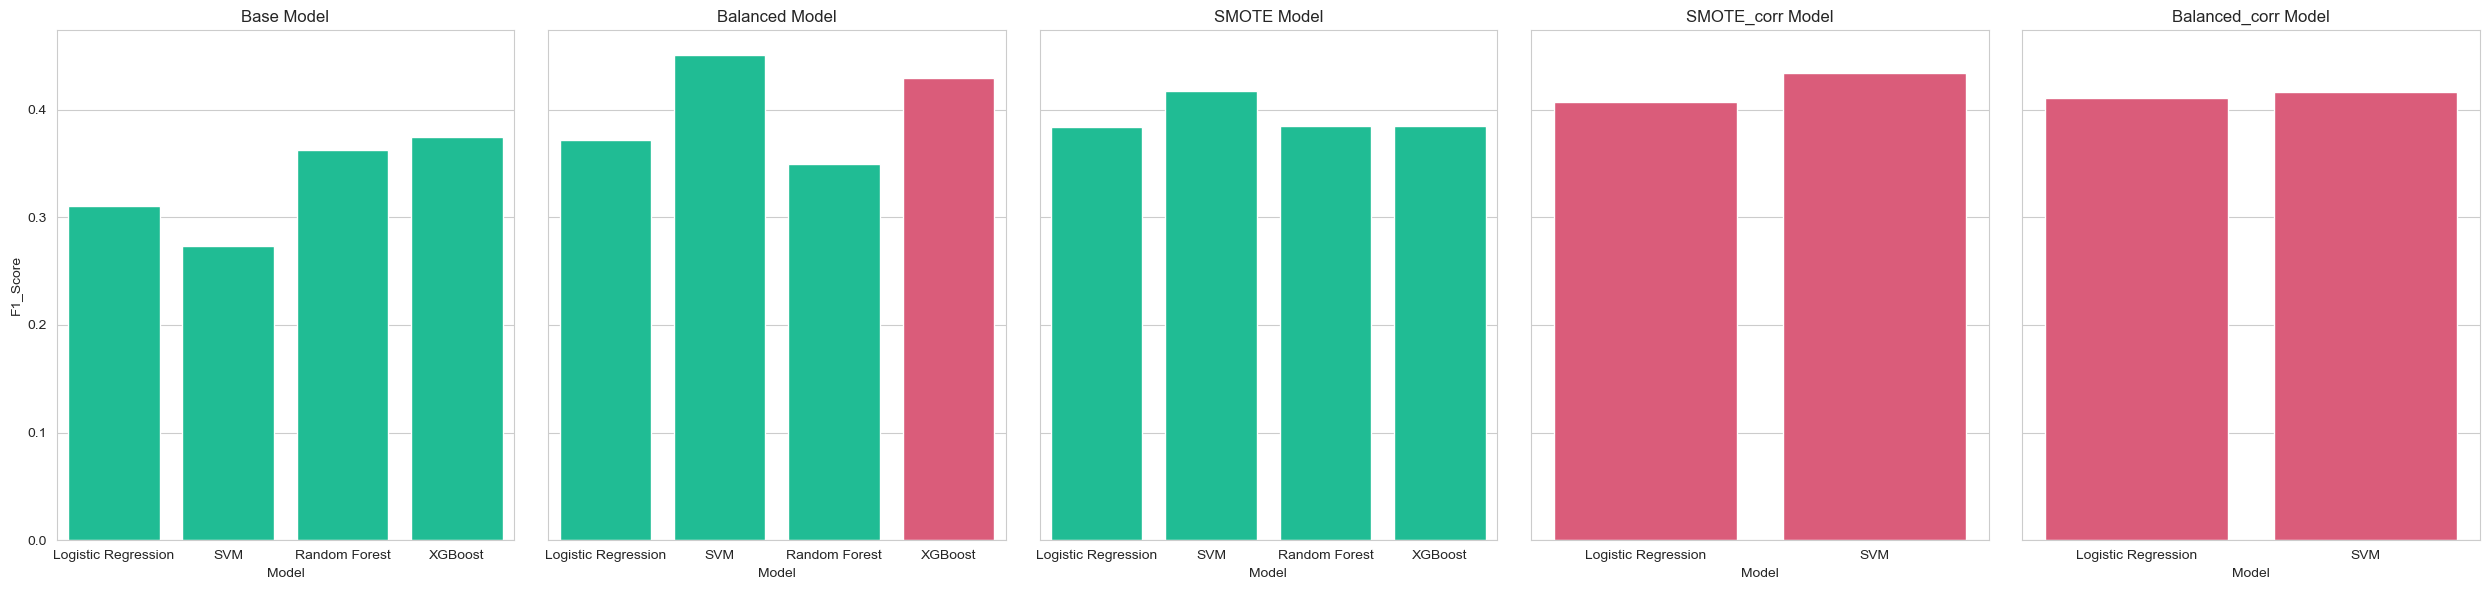

In [42]:
# Plot F1 Scores 
# Set figsize and create subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=True)

# Plot based models
sns.barplot(data=results_df[results_df['Type']=='Base'], x='Model', y='F1_Score', ax=axes[0], color=palette_1[0])
axes[0].set_title('Base Model')

# Plot balanced models
# Highlight XGBoost to help visualize model selections (See the markdown below)
# Slice results_df to make the color manipulation easier
balanced_df = results_df[results_df['Type']=='balanced']
# Make a palette for this plot
balanced_palette = [palette_1[1] if m == 'XGBoost' else palette_1[0] for m in balanced_df['Model']]
sns.barplot(data=balanced_df, x='Model', y='F1_Score', ax=axes[1], hue='Model', legend=False, palette=balanced_palette)
axes[1].set_title('Balanced Model')


# Plot Smote models
sns.barplot(data=results_df[results_df['Type']=='SMOTE'], x='Model', y='F1_Score', ax=axes[2], color=palette_1[0])
axes[2].set_title('SMOTE Model')

# Plot Smote_corr models
# Highlight the models to help visualize model selections (See the markdown below)
sns.barplot(data=results_df[results_df['Type']=='SMOTE_corr'], x='Model', y='F1_Score', ax=axes[3], color=palette_1[1])
axes[3].set_title('SMOTE_corr Model')

# Plot Balanced_corr models
# Highlight the models to help visualize model selections (See the markdown below)
sns.barplot(data=results_df[results_df['Type']=='balanced_corr'], x='Model', y='F1_Score', ax=axes[4], color=palette_1[1])
axes[4].set_title('Balanced_corr Model')

# Adjust the layout and plot the graphs
plt.tight_layout()
plt.show()

It doesn't imporve F1_score massively. Let's  do the hyperparameter tuning with promising models and see whether F1 scores are going to improve or not. I'm going to do it with the follwing models.
1. Balanced XGboost
2. SMOTE_corr Logistic Regression
3. SMOTE_corr SVM
4. Balanced_corr Logistic Regression
5. Balanced_corr SVM

I don't investigate SVM and Logistic regressions with correlated features because they are linear models, they has multicollinearity and it would be hard to interpret the models.

In [43]:
# Try hyperparameter tuning with XGBoost (GridSearch)
# Import json to save the parameters
import json

# Define where to save the tuning results
xgb_grid_tuning_results_path = Path('hyperparameter_results/best_params_xgb_grid.json')
xgb_grid_tuning_results_path.parent.mkdir(parents=True, exist_ok=True)

# Only run the following code if the tuning result doesn't exist
if not xgb_grid_tuning_results_path.exists():
    
# Create a pipeline
    xgb_balanced_pipeline = Pipeline([
        ('preprocessing', tree_preprocessor),
        ('model', XGBClassifier(n_jobs=-1,eval_metric='logloss', scale_pos_weight=XG_scale_weight, random_state=42))
    ])

    # Import GridSearch
    from sklearn.model_selection import GridSearchCV

    # Define parameter grid
    param_grid = {
        'model__max_depth': [3, 6, 9],
        'model__learning_rate': [0.01, 0.05, 0.1, 0.3],
        'model__gamma': [0, 0.25, 0.1, 0.5],
        'model__reg_lambda': [0, 1, 5, 10, 20],
        'model__reg_alpha':[0, 0.1, 0.5, 1]
    }
    # Import time to measure how long will it to take to finish the tuning
    import time

    # Start timer
    start_time_grid = time.time()

    # Implement GridSearch
    grid_search = GridSearchCV(
        estimator=xgb_balanced_pipeline,
        param_grid=param_grid,
        scoring='f1',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    
    # End timer
    end_time_grid = round(time.time() - start_time_grid)

    # Create a dictionary to save the best parameter
    best_params_xgb_grid = {}

    # Save the best parameter in the dictionary
    best_params_xgb_grid['best_params'] = grid_search.best_params_
    best_params_xgb_grid['best_score'] = grid_search.best_score_
    best_params_xgb_grid['tuning_time_in_sec'] = end_time_grid

    # Convert the dictionary to a json file so that the result is useable without running this code again
    with open(xgb_grid_tuning_results_path, 'w') as fh:
        json.dump(best_params_xgb_grid, fh, indent=4)

    # Get the best score and model
    print(f'Best F1 Score: {grid_search.best_score_}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Results saved to: {xgb_grid_tuning_results_path}')
    print(f'Tuning_time is {end_time_grid } seconds')



In [44]:
# Hyper parameter tuning for XGBoost
# Implement BayesSearchCV
# Import the library
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define where to save the tuning results
xgb_bayes_tuning_results_path = Path('hyperparameter_results/best_params_xgb_bayes_1.json')
xgb_bayes_tuning_results_path.parent.mkdir(parents=True, exist_ok=True)

# Only run the following code when the result file doesn't exist
if not xgb_bayes_tuning_results_path.exists():

    search_space_XGB_1 = {
        'model__max_depth': Integer(3, 9),
        'model__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'model__gamma': Real(0, 0.5),
        'model__reg_lambda': Real(0, 20),
        'model__reg_alpha': Real(0,1)
    }
    
    # Start timer
    start_time_bayes = time.time()

    bayes_search_XGB_1 = BayesSearchCV(
        estimator=balanced_models['XGBoost'],
        search_spaces=search_space_XGB_1,
        n_iter=80,
        scoring='f1',
        cv=cv,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    bayes_search_XGB_1.fit(X_train, y_train)

    # End timer
    end_time_bayes = round(time.time() - start_time_bayes, 2)

    print(f'Best F1 Score: {bayes_search_XGB_1.best_score_}')
    print(f'Best Parameters: {bayes_search_XGB_1.best_params_}')
    print(f'Tuning time is {end_time_bayes} seconds')

    # Save the best parameters so that I can use them later
    best_param_XGB_1 ={ 
        'best_params': bayes_search_XGB_1.best_params_,
        'best_score': bayes_search_XGB_1.best_score_,
        'tuning_time_in_sec': end_time_bayes
    }

    with open(xgb_bayes_tuning_results_path, 'w') as fh:
        json.dump(best_param_XGB_1, fh, indent=4)
    

In [45]:
# Import the json files and compare the tuning time and performance
with open(xgb_grid_tuning_results_path, 'r') as fh:
   best_params_xgb_grid_loaded  = json.load(fh)

with open(xgb_bayes_tuning_results_path, 'r') as fh:
   best_params_xgb_bayes_loaded = json.load(fh)

print(f"XGB Grid search best score: {best_params_xgb_grid_loaded['best_score']}")
print(f"XGB Bayes search best score: {best_params_xgb_bayes_loaded['best_score']}")
print(f"XGB Grid search tuning time is: {best_params_xgb_grid_loaded['tuning_time_in_sec']} seconds")
print(f"XGB Bayes search tuning time is: {best_params_xgb_bayes_loaded['tuning_time_in_sec']} seconds")

XGB Grid search best score: 0.47837283527039054
XGB Bayes search best score: 0.4792259118214929
XGB Grid search tuning time is: 327 seconds
XGB Bayes search tuning time is: 157.11 seconds


Bayes search is twice as fast as Grid search and the performance is slightly better. From now on, I'm going to use Bayes search for tuning other parameters.

In [46]:
# Hyper parameter tuning for SVM models
# Define where to save the results
linear_svc_tuning_results_path = Path('hyperparameter_results/best_params_linear_svc_corr_1.json')
linear_svc_tuning_results_path.parent.mkdir(parents=True, exist_ok=True)

# Run hyperparameter tuning only when results don't exist
if not linear_svc_tuning_results_path.exists():

    # Create a dictionary of SVM models' Pipelines
    # Increased max_iter to 2000 to help ensure convergence (default is 1000).
    linear_svc_models_corr = {
        'SVM_corr_SMOTE': Imbpipeline([
            ('preprocessing', linear_preprocessor_corr),
            ('smote', SMOTE(random_state=42)),
            ('select_corr', smart_corr_sel),
            ('model', LinearSVC(tol=1e-3, random_state=42, max_iter=2000)) 

        ]), 
        'SVM_corr_balanced': Pipeline([
            ('preprocessing', linear_preprocessor_corr),
            ('select_corr', smart_corr_sel),
            ('model', LinearSVC(class_weight='balanced', tol=1e-3, random_state=42, max_iter=2000)) 
        ])     
    }

    # Create a search space
    search_space_linear_svc = {
        'model__C': Real(1e-6, 10, prior='log-uniform')
    }

    # Create an empty dictionary to save the best parameters from the models
    best_params_linear_svc_corr_1 = {}

    # Implement Bayesian search and print each result
    for key in linear_svc_models_corr:
        # Start time
        start_time_linear_svc_corr_1 = time.time()

        bayes_search_linear_svc_1 = BayesSearchCV(
        estimator=linear_svc_models_corr[key],
        search_spaces=search_space_linear_svc,
        n_iter=80,
        scoring='f1',
        n_jobs=-1,
        cv=cv,
        verbose=1,
        random_state=42
        )

        bayes_search_linear_svc_1.fit(X_train, y_train)

         # End timer
        end_time_linear_svc_corr_1 = round(time.time() - start_time_linear_svc_corr_1, 2)

        best_params_linear_svc_corr_1[key] = {
            'best_params': bayes_search_linear_svc_1.best_params_,
            'best_score': bayes_search_linear_svc_1.best_score_,
            'tuning_time_in_sec': end_time_linear_svc_corr_1
        }
    

        print(f'Best F1 Score {key}: {bayes_search_linear_svc_1.best_score_}')
        print(f'Best Parameters {key}: {bayes_search_linear_svc_1.best_params_} ')
        print(f'Results saved to: {linear_svc_tuning_results_path}')
        print(f'Total tuing time is {end_time_linear_svc_corr_1 } seconds')
    
    # Convert the results in to json file
    with open(linear_svc_tuning_results_path, 'w') as fh:
        json.dump(best_params_linear_svc_corr_1, fh, indent=4)


In [47]:
# Load the file and print the performance and tuning time
with open(linear_svc_tuning_results_path, 'r') as fh:
    best_params_linear_svc_corr_1_loaded = json.load(fh)

print(f"SVM_corr_SMOTE best score: {best_params_linear_svc_corr_1_loaded['SVM_corr_SMOTE']['best_score']}")
print(f"SVM_corr_SMOTE Tuning time is: {best_params_linear_svc_corr_1_loaded['SVM_corr_SMOTE']['tuning_time_in_sec']} seconds")
print(f"SVM_corr_balanced best score: {best_params_linear_svc_corr_1_loaded['SVM_corr_balanced']['best_score']}")
print(f"SVM_corr_balanced Tuning time is: {best_params_linear_svc_corr_1_loaded['SVM_corr_balanced']['tuning_time_in_sec']} seconds")

SVM_corr_SMOTE best score: 0.4348636653561625
SVM_corr_SMOTE Tuning time is: 1148.68 seconds
SVM_corr_balanced best score: 0.441543029387209
SVM_corr_balanced Tuning time is: 23586.9 seconds


Linear_SVC failed to converge even with max_iter=2000 and the tuning took over 6 hours. So I'm going to try SGDClassifier. It doesn't guarantee better results, but it's faster than Linear_SVC (support n_jobs= -1, parallel fitting) and it might yield better outcomes.

In [48]:
# Hyper parameter tuning for SVM models with SGD classifier
# Import SGD Classifier
from sklearn.linear_model import SGDClassifier

# Define where to save the results
sgd_linear_svc_tuning_results_path = Path('hyperparameter_results/best_params_sgd_linear_svc_corr_1.json')
sgd_linear_svc_tuning_results_path.parent.mkdir(parents=True, exist_ok=True)

# Run hyperparameter tuning only when results don't exist
if not sgd_linear_svc_tuning_results_path.exists():

    # Create a dictionary of SGD SVM models' Pipelines
    # Increased max_iter to 5000 to help ensure convergence (default is 1000)
    sgd_linear_svc_models_corr = {
        'SVM_corr_SMOTE': Imbpipeline([
            ('preprocessing', linear_preprocessor_corr),
            ('smote', SMOTE(random_state=42)),
            ('select_corr', smart_corr_sel),
            ('model', SGDClassifier(loss='hinge', tol=1e-3, random_state=42, max_iter=5000, n_jobs=-1)) 

        ]), 
        'SVM_corr_balanced': Pipeline([
            ('preprocessing', linear_preprocessor_corr),
            ('select_corr', smart_corr_sel),
            ('model', SGDClassifier(loss='hinge', class_weight='balanced', tol=1e-3, random_state=42, max_iter=5000, n_jobs=-1)) 
        ])     
    }

    # Create a search space
    # Since SGD is faster than linear_svc, I'm going to tune more parameters
    search_space_sgd_linear_svc = {
        'model__penalty': Categorical(['l2', 'l1']),
        'model__alpha': Real(1e-6, 10, prior='log-uniform'),
    }

    # Create an empty dictionary to save the best parameters from the models
    best_params_sgd_linear_svc_corr_1 = {}

    # Implement Bayesian search and print each result
    for key in sgd_linear_svc_models_corr:
        # Start time
        start_time_sgd_linear_svc_corr_1 = time.time()

        bayes_search_sgd_linear_svc_1 = BayesSearchCV(
        estimator=sgd_linear_svc_models_corr[key],
        search_spaces=search_space_sgd_linear_svc,
        n_iter=80,
        scoring='f1',
        n_jobs=-1,
        cv=cv,
        verbose=1,
        random_state=42
        )

        bayes_search_sgd_linear_svc_1.fit(X_train, y_train)

         # End timer
        end_time_sgd_linear_svc_corr_1 = round(time.time() - start_time_sgd_linear_svc_corr_1, 2)

        best_params_sgd_linear_svc_corr_1[key] = {
            'best_params': bayes_search_sgd_linear_svc_1.best_params_,
            'best_score': bayes_search_sgd_linear_svc_1.best_score_,
            'tuning_time_in_sec': end_time_sgd_linear_svc_corr_1
        }
    

        print(f'Best F1 Score {key}: {bayes_search_sgd_linear_svc_1.best_score_}')
        print(f'Best Parameters {key}: {bayes_search_sgd_linear_svc_1.best_params_} ')
        print(f'Results saved to: {sgd_linear_svc_tuning_results_path}')
        print(f'Tuning time is {end_time_sgd_linear_svc_corr_1 } seconds')
    
    # Convert the results in to json file
    with open(sgd_linear_svc_tuning_results_path, 'w') as fh:
        json.dump(best_params_sgd_linear_svc_corr_1, fh, indent=4)

In [49]:
# Load the json file and compare the performance between linear_svc and SGD
with open(sgd_linear_svc_tuning_results_path, 'r') as fh:
    best_params_sgd_linear_svc_corr_1_loaded = json.load(fh)

print(f"SVM_corr_SMOTE_SGD best score: {best_params_sgd_linear_svc_corr_1_loaded['SVM_corr_SMOTE']['best_score']}")
print(f"SVM_corr_SMOTE_SGD Tuning time is: {best_params_sgd_linear_svc_corr_1_loaded['SVM_corr_SMOTE']['tuning_time_in_sec']} seconds")
print(f"SVM_corr_balanced_SGD best score: {best_params_sgd_linear_svc_corr_1_loaded['SVM_corr_balanced']['best_score']}")
print(f"SVM_corr_balanced_SGD Tuning time is: {best_params_sgd_linear_svc_corr_1_loaded['SVM_corr_balanced']['tuning_time_in_sec']} seconds")

print(f"SVM_corr_SMOTE best score: {best_params_linear_svc_corr_1_loaded['SVM_corr_SMOTE']['best_score']}")
print(f"SVM_corr_SMOTE Tuning time is: {best_params_linear_svc_corr_1_loaded['SVM_corr_SMOTE']['tuning_time_in_sec']} seconds")
print(f"SVM_corr_balanced best score: {best_params_linear_svc_corr_1_loaded['SVM_corr_balanced']['best_score']}")
print(f"SVM_corr_balanced Tuning time is: {best_params_linear_svc_corr_1_loaded['SVM_corr_balanced']['tuning_time_in_sec']} seconds")

SVM_corr_SMOTE_SGD best score: 0.4760070129043288
SVM_corr_SMOTE_SGD Tuning time is: 2480.64 seconds
SVM_corr_balanced_SGD best score: 0.4721073467856886
SVM_corr_balanced_SGD Tuning time is: 739.85 seconds
SVM_corr_SMOTE best score: 0.4348636653561625
SVM_corr_SMOTE Tuning time is: 1148.68 seconds
SVM_corr_balanced best score: 0.441543029387209
SVM_corr_balanced Tuning time is: 23586.9 seconds


SGD performs better than Linear_SVC. Therefore, I'll include SGDClassifier with these hyper parameters for further investigation.

In [50]:
# Hyperparameter tuning for Logistic Regression
# Define the path to store the outcomes
lr_model_corr_1_path = Path('hyperparameter_results/lr_model_corr_1.json')
lr_model_corr_1_path.parent.mkdir(parents=True, exist_ok=True)


# Create a dictionary of Logistic Regression model's Pipelines
# To maximize the outcome, increase max_iter to 1000 (default is 100).
# LogisticRegression supports n_jobs=-1 (parallel fitting), unlike LinearSVC, so training remains reasonably fast.
# Run the following code only when the file doesn't exist
if not lr_model_corr_1_path.exists():

    lr_models_corr = {
        'Logistic Regression_corr_SMOTE': Imbpipeline([
            ('preprocessing', linear_preprocessor_corr),
            ('smote', SMOTE(random_state=42)),
            ('select_corr', smart_corr_sel),
            ('model', LogisticRegression(solver='saga', tol=1e-3, n_jobs=-1, random_state=42, max_iter=1000))
        ]),
        'Logistic Regression_corr_balanced': Pipeline([
            ('preprocessing', linear_preprocessor_corr),
            ('select_corr', smart_corr_sel),
            ('model', LogisticRegression(class_weight='balanced',  solver='saga', tol=1e-3, n_jobs=-1, random_state=42, max_iter=1000))
        ]),    
    }

    # Define search space
    search_space_lr_models_corr = {
        'model__penalty': Categorical(['l1', 'l2']),
        'model__C': Real(1e-6, 10, prior='log-uniform')
    }

    # Create an empty dictionary to save the best parameters
    best_params_lr_models_corr = {}

    # Implement Bayesian Search
    for key in lr_models_corr:
        # Start timer
        start_time_lr_models_corr_1 = time.time()

        bayesian_search_lr_models_1 = BayesSearchCV(
            estimator=lr_models_corr[key],
            search_spaces=search_space_lr_models_corr,
            n_iter=80,
            scoring='f1',
            n_jobs=-1,
            cv=cv,
            verbose=1,
            random_state=42
        )
        
        bayesian_search_lr_models_1.fit(X_train, y_train)

        # End the timer
        end_time_lr_models_corr_1 = round(time.time() - start_time_lr_models_corr_1, 2)

        # Print the outcomes
        print(f'Best F1 Score {key}: {bayesian_search_lr_models_1.best_score_}')
        print(f'Best parameters {key}: {bayesian_search_lr_models_1.best_params_}')
        print(f'Results saved to {lr_model_corr_1_path}')
        print(f'Tuning time is {end_time_lr_models_corr_1} seconds')

        # Save the best parameters in the dictionary
        best_params_lr_models_corr[key] = {
            'best_params': bayesian_search_lr_models_1.best_params_,
            'best_score' : bayesian_search_lr_models_1.best_score_,
            'tuning_time_in_sec': end_time_lr_models_corr_1                              
                                           }

    # Convert the dictionary to json and save it
    with open(lr_model_corr_1_path, 'w') as fh:
        json.dump(best_params_lr_models_corr, fh, indent=4)

In [51]:
# Load the json file and print it
with open(lr_model_corr_1_path, 'r') as fh:
    best_params_lr_models_corr_1_loaded = json.load(fh)

print(f'best parameters for Logistic Regression: {best_params_lr_models_corr_1_loaded}')  

best parameters for Logistic Regression: {'Logistic Regression_corr_SMOTE': {'best_params': {'model__C': 5.3413121734697394e-05, 'model__penalty': 'l2'}, 'best_score': 0.45848711699649936, 'tuning_time_in_sec': 649.74}, 'Logistic Regression_corr_balanced': {'best_params': {'model__C': 9.473819813487277e-05, 'model__penalty': 'l2'}, 'best_score': 0.45579030287912553, 'tuning_time_in_sec': 486.09}}


**I'm going to  investigate the best threshold using these tuned hyperparameters to maximize model performance**

In [52]:
# Get the best parameters from the dictionary
best_params_xgb_bayes_1_dic = best_params_xgb_bayes_loaded['best_params']
best_params_linear_svc_corr_1_smote_dic = best_params_linear_svc_corr_1_loaded['SVM_corr_SMOTE']['best_params']
best_params_linear_svc_corr_1_balanced_dic = best_params_linear_svc_corr_1_loaded['SVM_corr_balanced']['best_params']
best_params_lr_models_corr_1_smote_dic = best_params_lr_models_corr_1_loaded['Logistic Regression_corr_SMOTE']['best_params']
best_params_lr_models_corr_1_balanced_dic = best_params_lr_models_corr_1_loaded['Logistic Regression_corr_balanced']['best_params']
best_params_sgd_linear_svc_corr_1_smote_dic = best_params_sgd_linear_svc_corr_1_loaded['SVM_corr_SMOTE']['best_params']
best_params_sgd_linear_svc_corr_1_balanced_dic = best_params_sgd_linear_svc_corr_1_loaded['SVM_corr_balanced']['best_params']

In [53]:
# Import numpy for calculation
import numpy as np

# Create a new dictionary of the models I want to evaluate
PR_curve_selected_models = {
    'Balanced_XGboost': balanced_models['XGBoost'].set_params(**best_params_xgb_bayes_1_dic),
    'Balanced_Logistic Regression_corr': balanced_models_corr['Logistic Regression'].set_params(**best_params_lr_models_corr_1_balanced_dic),
    'Balanced_SVM_corr': balanced_models_corr['SVM'].set_params(**best_params_linear_svc_corr_1_balanced_dic),
    'SMOTE_Logistic Regression_corr': smote_models_corr['Logistic Regression'].set_params(**best_params_lr_models_corr_1_smote_dic),
    'SMOTE_SVM_corr': smote_models_corr['SVM'].set_params(**best_params_linear_svc_corr_1_smote_dic ),
    'Balanced_SVM_corr_SGD':  Pipeline([
        ('preprocessing', linear_preprocessor_corr),
        ('select_corr', smart_corr_sel),
        ('model', SGDClassifier(class_weight='balanced', tol=1e-3, random_state=42, n_jobs=-1))
        ]).set_params(**best_params_sgd_linear_svc_corr_1_balanced_dic),
    'SMOTE_SVM_corr_SGD': Imbpipeline([
        ('preprocessing', linear_preprocessor_corr),
        ('smote', SMOTE(random_state=42)),
        ('select_corr', smart_corr_sel),
        ('model', SGDClassifier(tol=1e-3, random_state=42, n_jobs=-1))
    ]).set_params(**best_params_sgd_linear_svc_corr_1_smote_dic)
        
    
}

# Make a list to store PR scores for each model and threshold
PR_scores =[]

# Calculate PR_scores and append them to the list
for label, model in PR_curve_selected_models.items():
    # Get cross validation scores
    # LinearSVC doesn't support probability. So use decision function to calculate PR scores.
    # Slice the probability scores for the positive label
    try:
        y_scores = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba', n_jobs=-1)[:,1]
    
    # The output of decision function is a 1D array. So we don't need slicing here.
    except:
        y_scores = cross_val_predict(model, X_train, y_train, cv=cv, method='decision_function', n_jobs=-1)

    # Calculate PR and get the thresholds for each PR
    precision, recall, thresholds = precision_recall_curve(y_train, y_scores)

    # Calculate PR AUC scores
    pr_auc = auc(recall, precision)

    # Calculate Best F1 score and threshold
    # Add 1e-20 to denominator to avoid 0 division error
    f1_scores = 2*(precision*recall) / (precision + recall + 1e-10)
    best_f1 = f1_scores.max()
    best_idx = f1_scores.argmax()
    best_threshold = thresholds[best_idx]

    # Create a dictionary with labels as keys and PR scores and thresholds as values
    PR_dic ={
        'label': label,
        'precision': precision,
        'recall': recall,
        'auc': pr_auc,
        'best_f1': best_f1,
        'best_threshold' : best_threshold
    }
    
    # append the dictionary to the list
    PR_scores.append(PR_dic)

In [54]:
# Check the list
print(PR_scores)

[{'label': 'Balanced_XGboost', 'precision': array([0.11265652, 0.11266042, 0.11262964, ..., 0.76923077, 0.77272727,
       1.        ]), 'recall': array([1.        , 1.        , 0.99969212, ..., 0.00615764, 0.00523399,
       0.        ]), 'auc': 0.45077108411981326, 'best_f1': 0.4942996742178013, 'best_threshold': 0.6007459}, {'label': 'Balanced_Logistic Regression_corr', 'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.5       , 1.        ,
       1.        ]), 'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.07881773e-04, 3.07881773e-04, 0.00000000e+00]), 'auc': 0.40591035585614593, 'best_f1': 0.45485967090309753, 'best_threshold': 0.5056090152060118}, {'label': 'Balanced_SVM_corr', 'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.5       , 0.        ,
       1.        ]), 'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.07881773e-04, 0.00000000e+00, 0.00000000e+00]), 'auc': 0.37155022284155903, 

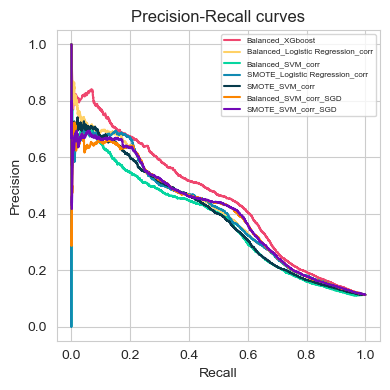

In [55]:
# Plot the PR curve from the data
# Define custom color palette for all models
palette_3 =['#ef476f', '#ffd166', '#06d6a0', '#118ab2', '#073b4c', '#fb8500', '#7209b7']

# plot PR curve
plt.figure(figsize=(4,4))
# Make a loop to draw the curve for each model with the custom colors
for i, label_name in  enumerate(PR_scores):
    plt.plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

# Decide the layout of the plots
plt.legend(loc='upper right', fontsize='xx-small')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.tight_layout()
plt.grid(True)

plt.show()

Plot the top 3 models and top 5 models (by AUC) side by side to investigate their behavior more closely.

In [56]:
# Sort models by AUC in descending order
PR_scores_sorted = sorted(PR_scores, key=lambda x: x['auc'], reverse=True) 

# Get the top 3 models
PR_scores_t3 = PR_scores_sorted[0:3]

# Get the top 3 models
PR_scores_t5 = PR_scores_sorted[0:5]
PR_scores_t5

[{'label': 'Balanced_XGboost',
  'precision': array([0.11265652, 0.11266042, 0.11262964, ..., 0.76923077, 0.77272727,
         1.        ]),
  'recall': array([1.        , 1.        , 0.99969212, ..., 0.00615764, 0.00523399,
         0.        ]),
  'auc': 0.45077108411981326,
  'best_f1': 0.4942996742178013,
  'best_threshold': 0.6007459},
 {'label': 'Balanced_Logistic Regression_corr',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.5       , 1.        ,
         1.        ]),
  'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         3.07881773e-04, 3.07881773e-04, 0.00000000e+00]),
  'auc': 0.40591035585614593,
  'best_f1': 0.45485967090309753,
  'best_threshold': 0.5056090152060118},
 {'label': 'SMOTE_SVM_corr_SGD',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 1.        , 1.        ,
         1.        ]),
  'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         6.15763547e-04, 3.07881773e-04, 0.00000

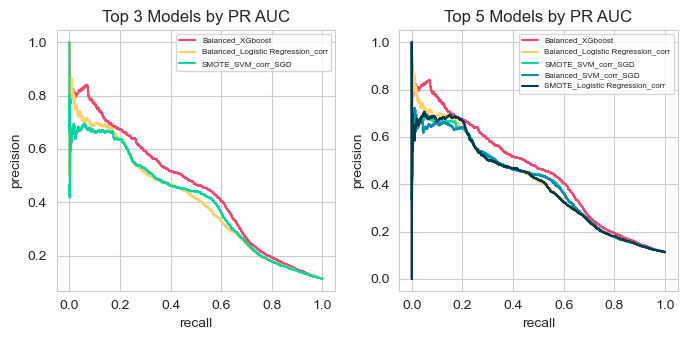

In [57]:
# make a grid
fig, ax = plt.subplots(1, 2, figsize=(7,3.5))

# Plot the top 3 models
for i, label_name in enumerate(PR_scores_t3):
    ax[0].plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

ax[0].legend(loc='upper right', fontsize='xx-small')
ax[0].set_title('Top 3 Models by PR AUC')
ax[0].set_xlabel('recall')
ax[0].set_ylabel('precision')
ax[0].grid(True)

# plot the top 5 models
for i, label_name in enumerate(PR_scores_t5):
    ax[1].plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

ax[1].legend(loc='upper right', fontsize='xx-small')
ax[1].set_title('Top 5 Models by PR AUC')
ax[1].set_xlabel('recall')
ax[1].set_ylabel('precision')
ax[1].grid(True)

plt.tight_layout()
plt.show()

Balanced_XGboost, Balanced_Logistic_Regression_corr and SMOTE_SVM_corr_SGD are the top 3 models based on AUC and the models seem to be relatively stable.

Although SMOTE_Logistic_Regression_corr and Balanced_SVM_corr_SGD perform well at certain thresholds, they're unstable (leading to low AUC score). So I'm going to investigate these top 3 models more.

In [58]:
# Save the top 3 thresholds, F1 and AUC scores in a dictionary and print it
# Create an empty dictionary to save them
top3_threshold_f1_auc_tuned = {}

for dic in PR_scores_t3:
    top3_threshold_f1_auc_tuned[dic['label']] = {
        'best_threshold': dic['best_threshold'],
        'best_f1': dic['best_f1'],
        'auc': dic['auc'],
        }

# Import pprint to see the dictionary clearly
from pprint import pprint

pprint(top3_threshold_f1_auc_tuned)

{'Balanced_Logistic Regression_corr': {'auc': 0.40591035585614593,
                                       'best_f1': 0.45485967090309753,
                                       'best_threshold': 0.5056090152060118},
 'Balanced_XGboost': {'auc': 0.45077108411981326,
                      'best_f1': 0.4942996742178013,
                      'best_threshold': 0.6007459},
 'SMOTE_SVM_corr_SGD': {'auc': 0.4042087073867131,
                        'best_f1': 0.47646368491661506,
                        'best_threshold': -0.0009389268679491636}}


In [59]:
# Make a list of dictionaries to save the f1 scores of the top 3 models to compare it with other models
# Create a list of dictionaries
results_tuned_1 = [
    {'Model': 'Logistic Regression',
     'Type': 'balanced_corr_tuned_1',
     'F1_Score': top3_threshold_f1_auc_tuned['Balanced_Logistic Regression_corr']['best_f1']
     },

     {'Model': 'XGBoost',
      'Type': 'balanced_tuned_1',
      'F1_Score': top3_threshold_f1_auc_tuned['Balanced_XGboost']['best_f1']
     },

    {'Model': 'SVM',
      'Type': 'SMOTE_corr_SGD_tuned_1',
      'F1_Score': top3_threshold_f1_auc_tuned['SMOTE_SVM_corr_SGD']['best_f1']
     }
]

# Convert it to a DataFrame
results_df_tuned_1 = pd.DataFrame(results_tuned_1)

#Concatenate it to results_df and remove potential duplicates
results_df = pd.concat([results_df, results_df_tuned_1], ignore_index=True)
results_df = results_df.drop_duplicates()

results_df

,Model,Type,F1_Score
0,Logistic Regression,Base,0.310206
1,SVM,Base,0.273432
2,Random Forest,Base,0.362800
3,XGBoost,Base,0.374902
4,Logistic Regression,balanced,0.372052
5,SVM,balanced,0.451117
6,Random Forest,balanced,0.349071
7,XGBoost,balanced,0.429441
8,Logistic Regression,SMOTE,0.383609
9,SVM,SMOTE,0.417530


In [60]:
# Make a combined label column for clearer axis labels in plots of top 5 and top 3 models
# This is because they have mixed hyperparameter tuning or preprocessing types in the same plots unlike the earlier grouped plots I have used
results_df['Plot_label'] = results_df['Model'] + ['_'] + results_df['Type']

In [61]:
# Check the new column
results_df

,Model,Type,F1_Score,Plot_label
0,Logistic Regression,Base,0.310206,Logistic Regression_Base
1,SVM,Base,0.273432,SVM_Base
2,Random Forest,Base,0.362800,Random Forest_Base
3,XGBoost,Base,0.374902,XGBoost_Base
4,Logistic Regression,balanced,0.372052,Logistic Regression_balanced
5,SVM,balanced,0.451117,SVM_balanced
6,Random Forest,balanced,0.349071,Random Forest_balanced
7,XGBoost,balanced,0.429441,XGBoost_balanced
8,Logistic Regression,SMOTE,0.383609,Logistic Regression_SMOTE
9,SVM,SMOTE,0.417530,SVM_SMOTE


In [62]:
# Slice the DataFrame to plot the graph
# Slice Balanced XGboost, SMOTE_corr Logistic Regression, SMOTE_corr SVM, Balanced_corr Logistic Regression, Balanced_corr SVM
# These are the models that I found promising before hyper parameter tuning
promising_models_before_tune = results_df[((results_df['Model']=='XGBoost') & (results_df['Type']=='balanced')) |
                                          ((results_df['Model']=='Logistic Regression') & (results_df['Type']=='SMOTE_corr')) |
                                          ((results_df['Model']=='SVM') & (results_df['Type']=='SMOTE_corr')) |
                                          ((results_df['Model']=='Logistic Regression') & (results_df['Type']=='balanced_corr')) |
                                          ((results_df['Model']=='SVM') & (results_df['Type']=='balanced_corr')) 
                                          ]
# Sort it according to the Model name
promising_models_before_tune_sorted = promising_models_before_tune.sort_values('Model')

# Slice top 3 tuned models
tuned_models_t3 = results_df.iloc[16:19]

# Slice the base models
base_models = results_df.iloc[0:4]

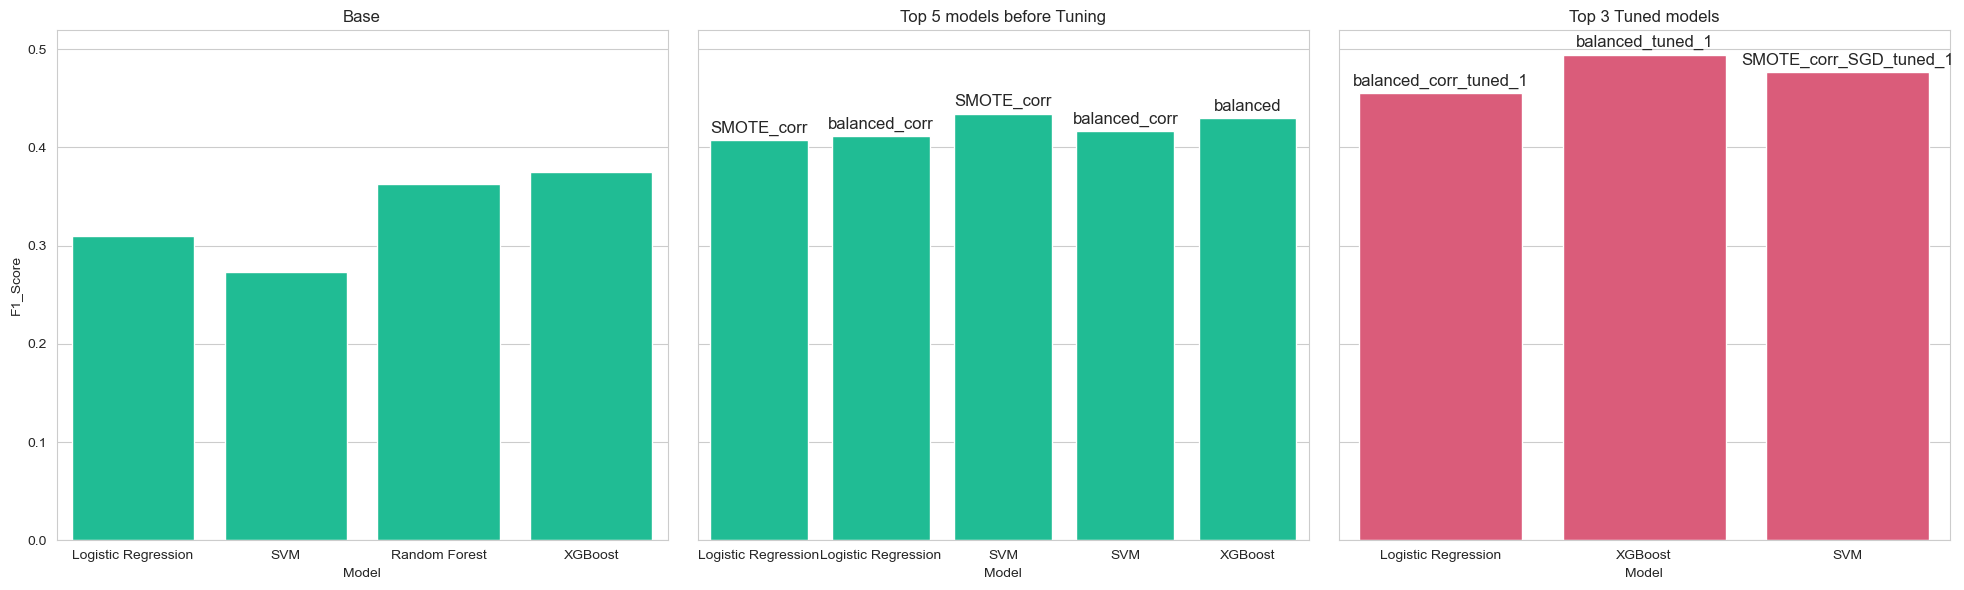

In [63]:
# Define the grid and set the same ticks for y axis
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot the base models
sns.barplot(data=base_models, x='Model', y='F1_Score', ax=axes[0], color=palette_1[0])
axes[0].set_title('Base')


# Plot the first 5 promising models before the tuning
sns.barplot(data=promising_models_before_tune_sorted,  x='Plot_label', y='F1_Score',ax=axes[1], color=palette_1[0])
axes[1].set_title('Top 5 models before Tuning')
axes[1].set_xticks(range(len(promising_models_before_tune_sorted )))
axes[1].set_xticklabels(promising_models_before_tune_sorted['Model'])
axes[1].set_xlabel('Model')

# Annotate Type above each bar
for i, bar in enumerate(axes[1].patches):
    height_t5_1 = bar.get_height()
    model_type_t5_1 = promising_models_before_tune_sorted['Type'].iloc[i]
    axes[1].annotate(
        model_type_t5_1,
        xy=(bar.get_x() + bar.get_width() / 2, height_t5_1),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=12,
    )

# Plot the top 3 tuned models
# Highlight the plot to help visualize the model selection (see the markdown below)
sns.barplot(data=tuned_models_t3, x='Plot_label', y='F1_Score', ax=axes[2], color=palette_1[1])
axes[2].set_title('Top 3 Tuned models')
axes[2].set_xticks(range(len(tuned_models_t3)))
axes[2].set_xticklabels(tuned_models_t3['Model'])
axes[2].set_xlabel('Model')

# Annotate Type above each bar
for i, bar in enumerate(axes[2].patches):
    height_t3_1 = bar.get_height()
    model_type_t3_1 = tuned_models_t3['Type'].iloc[i]
    axes[2].annotate(
        model_type_t3_1,
        xy=(bar.get_x() + bar.get_width() / 2, height_t3_1),
        xytext=(0,3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.tight_layout()
plt.show()


Since the top 3 tuned models perform best, I'll focus on enhancing them.

**Feature engineering**

First, I'm going to try to improve these 3 models with feature enigineering.

To avoid Data leckage, perform EDA only in the train dataset.

In [64]:
# Check the information of the train dataset again
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 7309 to 10241
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  campaign        28831 non-null  int64  
 11  pdays           28831 non-null  int64  
 12  previous        28831 non-null  int64  
 13  poutcome        28831 non-null  object 
 14  emp.var.rate    28831 non-null  float64
 15  cons.price.idx  28831 non-null  float64
 16  cons.conf.idx   28831 non-null  float64
 17  euribor3m       28831 non-null  f

In [65]:
# Check the head of the train dataset
X_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7309,50,blue-collar,single,basic.4y,no,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
4169,51,services,married,professional.course,unknown,no,no,telephone,may,mon,5,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0
35810,46,technician,divorced,professional.course,no,yes,no,cellular,may,mon,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
9668,46,admin.,single,university.degree,no,yes,no,telephone,jun,mon,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
34389,25,services,single,high.school,no,no,no,cellular,may,thu,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
34732,52,technician,married,basic.6y,unknown,no,no,cellular,may,thu,3,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1
36500,29,technician,single,university.degree,no,yes,no,cellular,jun,wed,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2
12415,42,technician,married,professional.course,unknown,no,no,cellular,jul,mon,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
24683,52,admin.,married,basic.4y,no,yes,yes,cellular,nov,mon,3,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
25657,47,housemaid,married,unknown,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8


In [66]:
# Check the unique values of categorical data
for col in cat_cols_model:
    print(f'{col}: {X_train[col].unique()}')


job: ['blue-collar' 'services' 'technician' 'admin.' 'housemaid' 'management'
 'unknown' 'self-employed' 'retired' 'entrepreneur' 'student' 'unemployed']
marital: ['single' 'married' 'divorced' 'unknown']
education: ['basic.4y' 'professional.course' 'university.degree' 'high.school'
 'basic.6y' 'unknown' 'basic.9y' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'nov' 'aug' 'apr' 'sep' 'dec' 'mar' 'oct']
day_of_week: ['thu' 'mon' 'wed' 'fri' 'tue']
poutcome: ['nonexistent' 'failure' 'success']


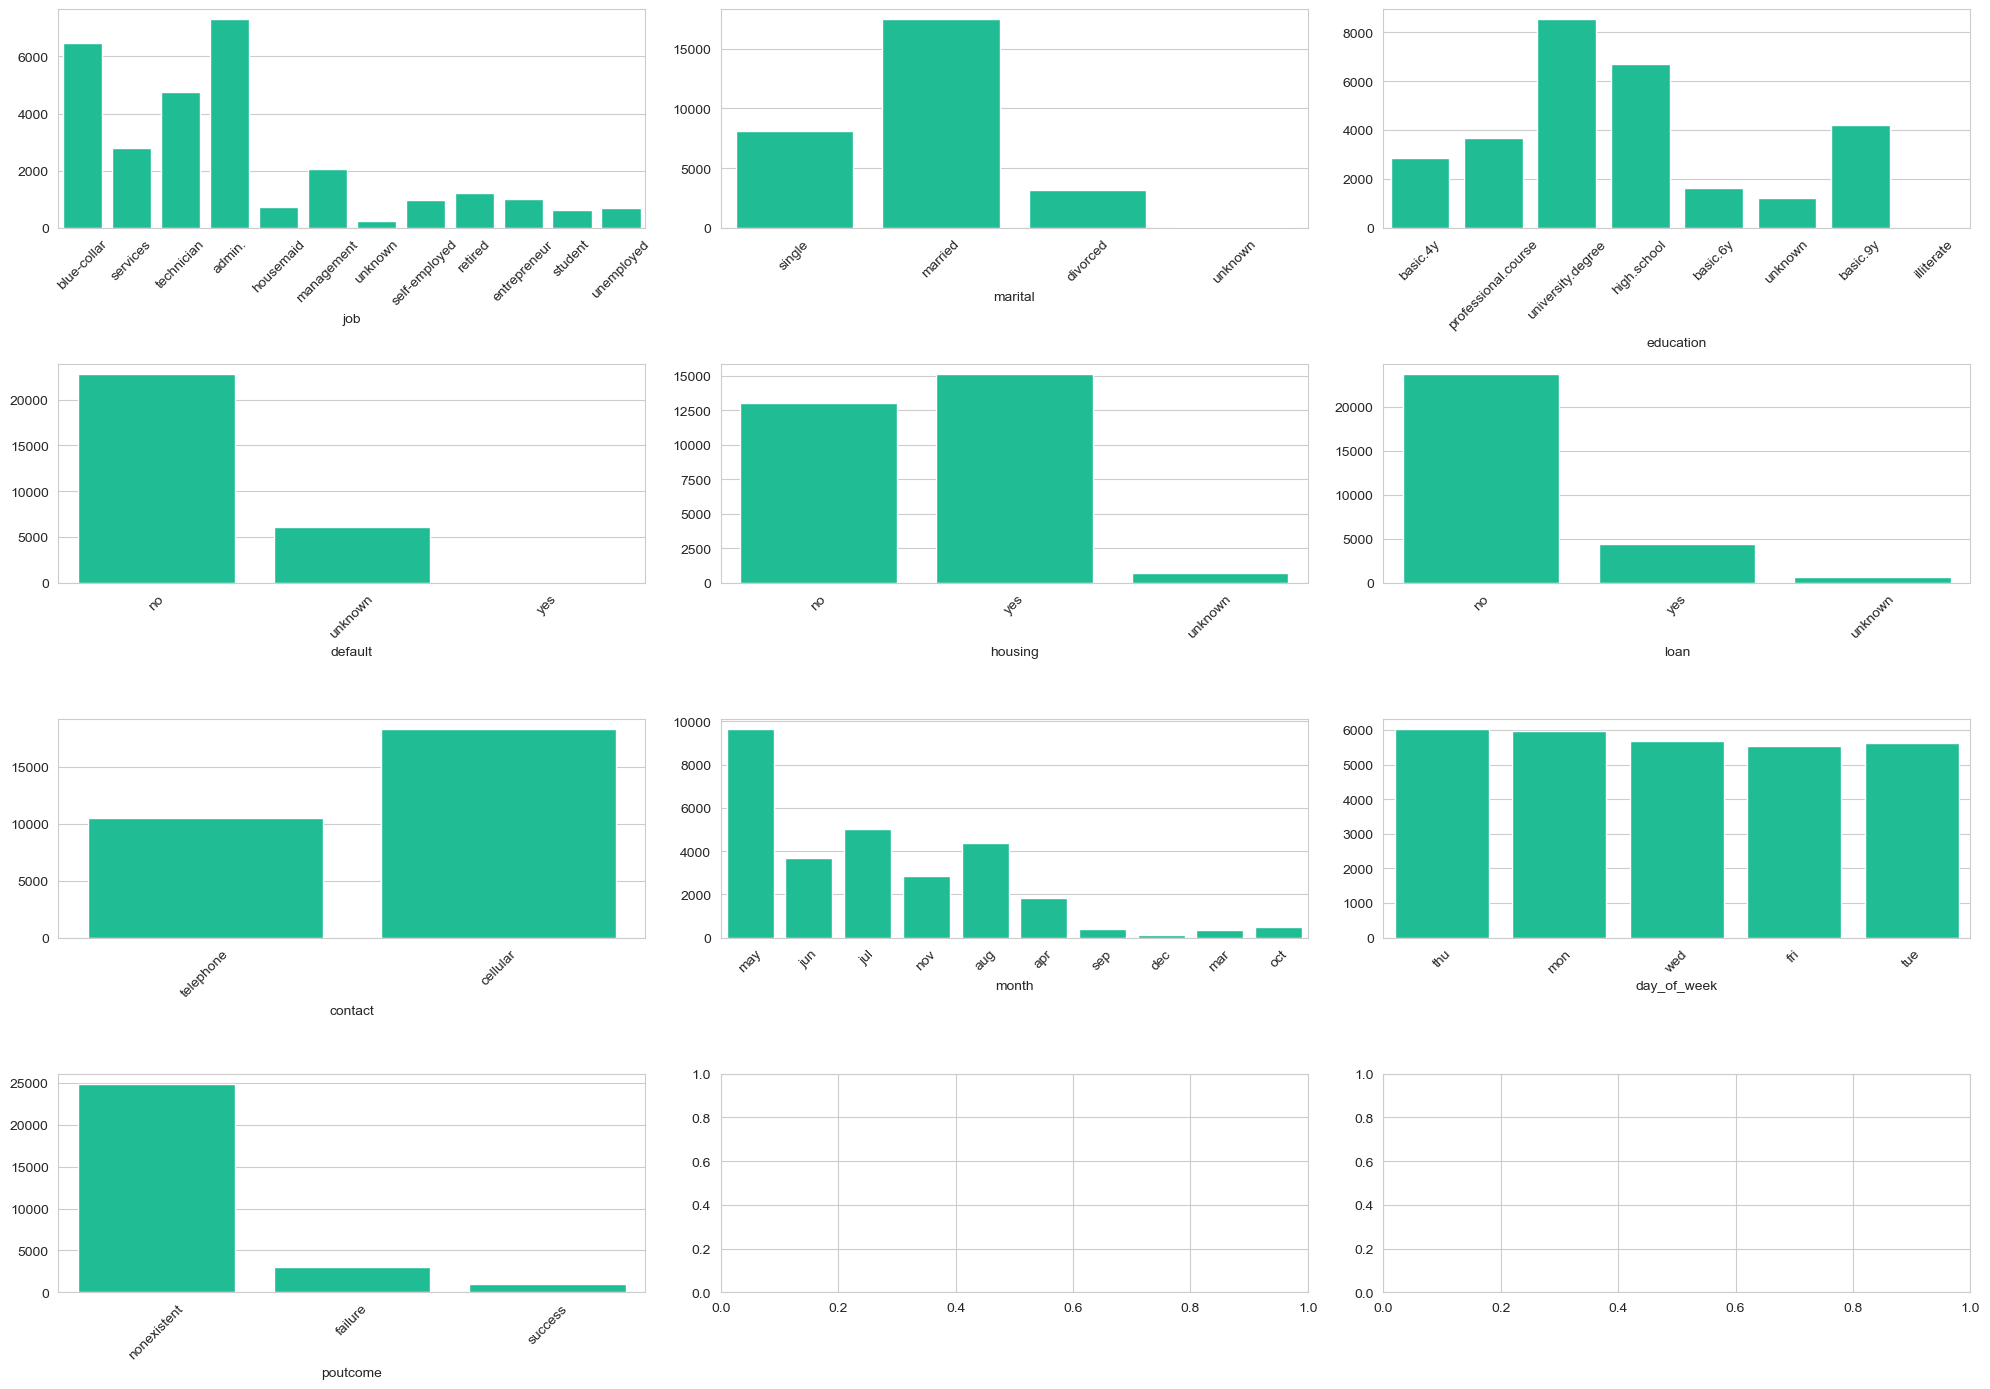

In [67]:
# Create count plots of categorical features
# Create a grid layout
fig, axes = plt.subplots(nrows=math.ceil(len(cat_cols_model)/3), ncols=3, figsize=(20, 14))

# Create count plots
for i, col in enumerate(cat_cols_model):
    # Compute indexes for the subplots
    row_idx = i // 3
    col_idx = i % 3
    
    sns.countplot(data=X_train, x=col, ax=axes[row_idx][col_idx], color=palette_1[0])
    axes[row_idx][col_idx].set_ylabel('')

    # Rotate x-tick labels to avoid overlapping 
    axes[row_idx][col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [68]:
# Import a library to create custom transformer
from sklearn.preprocessing import FunctionTransformer

# Create a function to transform some categorical features to use in a pipeline
def cat_engineering(X):
    # Prevent transformation in place
    X = X.copy()

    # Create 3 new features
    # This could indicate lifestyle and financial situation
    X['job_marital'] = X['job'] + '_' + X['marital']

    # This could indicate stability of life situation
    X['housing_marital'] = X['housing'] + '_' + X['marital']

    # This could indicate the interaction between months and contact methods
    X['contact_month'] = X['contact'] + '_' + X['month']

    # Drop the original features
    X.drop(columns=['job', 'marital', 'month'], inplace=True)

    return X

# Define the new transformer
cat_engineering_transformer = FunctionTransformer(cat_engineering)


In [69]:
# Get a summary statistics of numerical features
X_train.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28831.000000,28831.000000,28831.00000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.011550,2.557490,961.21789,0.176060,0.082286,93.576028,-40.503906,3.619137,5166.924661
std,10.393815,2.753098,189.97666,0.501829,1.570243,0.578345,4.624344,1.735812,72.472903
min,17.000000,1.000000,0.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.00000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.00000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.00000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.00000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


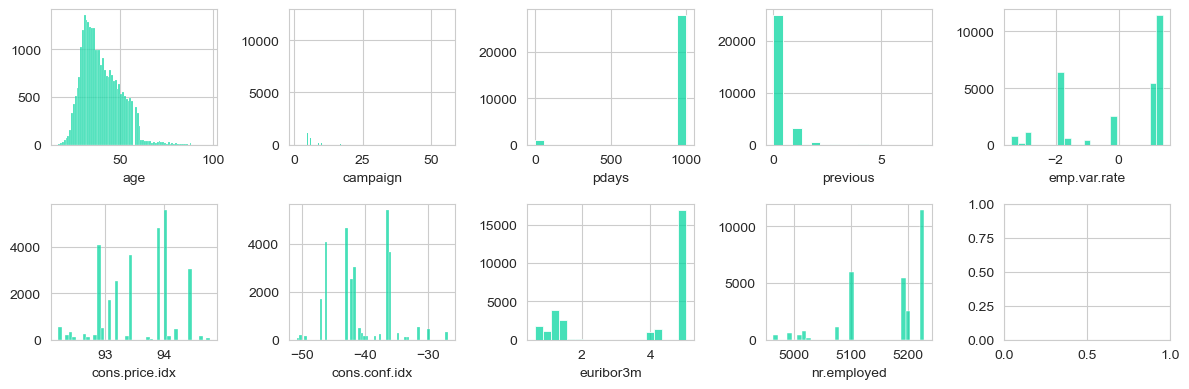

In [70]:
# Draw histogram
# Create subplots
fig, axes = plt.subplots(nrows=math.ceil(len(num_cols_model)/5), ncols=5, figsize=(12, 4))

# Create histograms
for i, col in enumerate(num_cols_model):
    row_idx = i // 5
    col_idx = i % 5

    sns.histplot(data=X_train, x=col, ax=axes[row_idx][col_idx], color=palette_1[0])
    axes[row_idx][col_idx].set_ylabel('')

plt.tight_layout()
plt.show()


     

In [71]:
# Pday 999 means customers were never contacted
# Let's check pdays closely
X_train['pdays'].value_counts()


pdays
999    27734
3        317
6        300
4         86
2         49
7         42
10        40
9         39
12        34
5         33
13        27
11        20
1         19
15        18
14        16
0         12
8         12
17         8
16         8
18         6
22         3
19         2
21         2
26         1
20         1
27         1
25         1
Name: count, dtype: int64

Most of the rows include 999 and this could add noise to model. Let's investigate the distribution of this feature without 999.

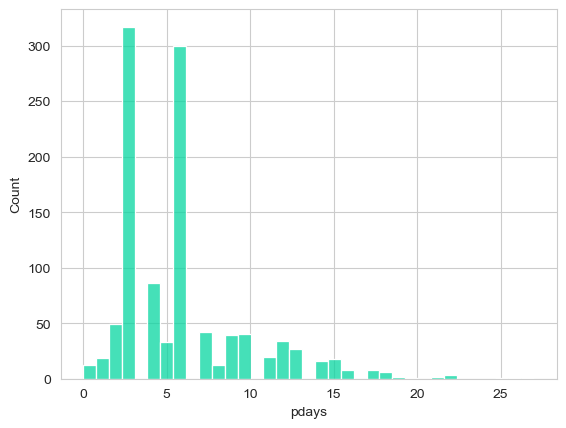

In [72]:
# Plot the distribution of pdays without 999
sns.histplot(X_train[X_train['pdays']!=999]['pdays'], color=palette_1[0])
plt.show()

999 could confuse models because it means customers were contacted 999 days ago and it's different from never being contacted. So I'll approach this in 3 steps.
1. Create a new binary column indicating whether there were contacts or not.
2. For linear models, change 999 to -1 to make less extreme. It's not perfect, but it can indicate this is different from other values and it helps reduce distribution skew.

3. For tree based models,  change 999 to Nan because tree based models can handle Nan and that's more precise definition.


In [73]:
# Create a function for the custom transformer for pdays for linear models
def pdays_engineering_linear(X):
    X = X.copy()
    # Create a binary flag.
    # If there were a contact 1, otherwise 0
    X['pdays_flag'] = (X['pdays'] != 999).astype(int)

    # Replace 999 to -1
    X['pdays'] = X['pdays'].replace(999, -1)

    return X

def pdays_engineering_tree(X):
    X = X.copy()
    # Create a binary flag.
    # If there were a contact 1, otherwise 0
    X['pdays_flag'] = (X['pdays'] != 999).astype(int)

    # Replace 999 to Nan
    X['pdays'] = X['pdays'].replace(999, np.nan)

    return X

# Create custom transformers
pdays_engineering_linear_transformer = FunctionTransformer(pdays_engineering_linear)
pdays_engineering_tree_transformer = FunctionTransformer(pdays_engineering_tree)

Campaign and previous are right-skewed and applying a log transformation can make their distributions more symmetrical and suitable for linear models. Let's investigate.

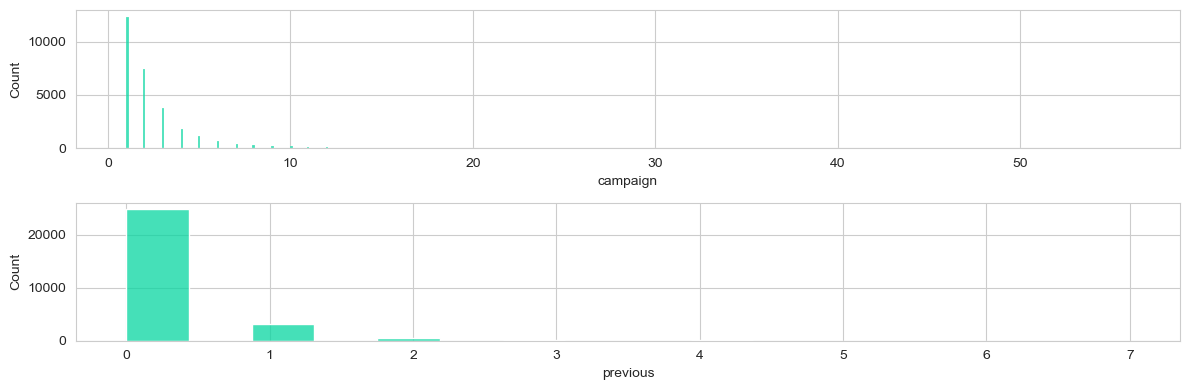

In [74]:
# Check the distributions of 2 features
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 4))

# plot 'campaign'
sns.histplot(data=X_train, x='campaign', ax=axes[0], color=palette_1[0])

# plot 'previous'
sns.histplot(data=X_train, x='previous', ax=axes[1], color=palette_1[0])

plt.tight_layout()
plt.show()

In [75]:
# Check the value counts of 'campaign'
print(X_train['campaign'].value_counts())

campaign
1     12352
2      7401
3      3787
4      1845
5      1113
6       684
7       422
8       279
9       195
10      167
11      118
12       71
13       67
14       48
17       41
16       38
15       36
18       23
20       21
21       16
19       15
22       12
24       11
23       10
27        9
26        7
29        6
25        5
28        5
31        5
30        5
35        4
33        3
43        2
32        2
42        2
34        1
40        1
56        1
37        1
Name: count, dtype: int64


In [76]:
# Check the value count of 'previous'
print(X_train['previous'].value_counts())

previous
0    24838
1     3234
2      534
3      151
4       56
5       12
6        5
7        1
Name: count, dtype: int64


1. The feature 'campaign' doesn't contain zeros, so apply a log transformation to reduce skew.
2. The feature 'previous' contains zeros, so apply a square root transformation to reduce skew.
3. Before creating transformers, investigate how these transformations affect the distribution to ensure they are effective.

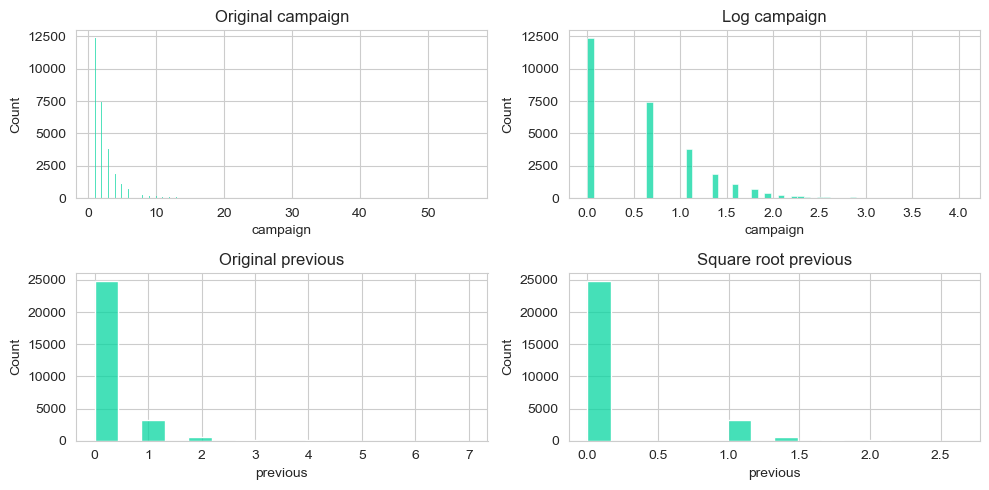

In [77]:
# Visualize original and transformed versions of each feature
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot original 'campaign'
sns.histplot(data=X_train, x='campaign', ax=axes[0][0], color=palette_1[0])
axes[0, 0].set_title('Original campaign')

# Plot transformed 'campaign' (log transformation)
sns.histplot(np.log(X_train['campaign']), ax=axes[0][1], color=palette_1[0])
axes[0, 1].set_title('Log campaign')

# Plot original 'previous'
sns.histplot(data=X_train, x='previous', ax=axes[1][0], color=palette_1[0])
axes[1, 0].set_title('Original previous')

# plot transformed 'previous' (square root transformation)
sns.histplot(np.sqrt(X_train['previous']), ax=axes[1][1], color=palette_1[0])
axes[1, 1].set_title('Square root previous')

plt.tight_layout()
plt.show()




These transformations don't make the distributions symmetrical, but they do help reduce the impact on extreme values without changing the overall shape of the distributions. Therefore, I'll apply these transformations to these two features.

In [78]:
# Create a transformer to implement log and square root transformation to the features
# Create a function to be used in the transformer
def campaign_previous_engineering_linear(X):
    X = X.copy()
    # Implement log transformation in 'campaign'
    X['campaign'] = np.log(X['campaign']) 

    # Implement square root transformation in 'previous'
    X['previous'] = np.sqrt(X['previous'])

    return X

# Create custom transformers
campaign_previous_engineering_linear_transformer = FunctionTransformer(campaign_previous_engineering_linear)

**Now, transformers for feature engineering are prepared. Let's run the models with these transformers and compare the performances.**

In [79]:
# Since there will be new columns after feature engineering, preprocessor should be updated
# Import a library
from sklearn.compose import make_column_selector

# Define preprocessing steps
# With linear model drop first to avoid multicollinearity
# Since there are lots of outliers use Robust scaler
linear_preprocessor_corr_f = ColumnTransformer([
    ('num', RobustScaler(), make_column_selector(dtype_exclude='object')),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), make_column_selector(dtype_include='object'))
])

# Tree_based models don't need scaling 
# Do one hot encoding without dropping first feature because it's not linear models
tree_preprocessor_f = ColumnTransformer([
    ('num','passthrough', make_column_selector(dtype_exclude='object')),
    ('cat', OneHotEncoder(drop=None, handle_unknown='ignore'), make_column_selector(dtype_include='object'))
])

In [80]:
# Define the new pipeline for the models
top_3_models_f_1 = {
    'XGBoost_balanced_f_1': Pipeline([
        ('cat_feature_engineering', cat_engineering_transformer),
        ('num_feature_engineering',pdays_engineering_tree_transformer),
        ('preprocessing', tree_preprocessor_f),
        ('model', XGBClassifier(eval_metric='logloss', scale_pos_weight=XG_scale_weight, random_state=42, n_jobs=1))
]),

    'SMOTE_SVM_corr_SGD_f_1': Imbpipeline([
        ('cat_feature_engineering', cat_engineering_transformer),
        ('num_feature_engineering_1', pdays_engineering_linear_transformer),
        ('num_feature_engineering_2', campaign_previous_engineering_linear_transformer),
        ('preprocessing', linear_preprocessor_corr_f),
        ('smote', SMOTE(random_state=42)),
        ('select_corr', smart_corr_sel),
        ('model', SGDClassifier(tol=1e-3, random_state=42, n_jobs=-1))
]) , 

   'Logistic Regression_balanced_corr_f_1': Pipeline([
        ('cat_feature_engineering', cat_engineering_transformer),
        ('num_feature_engineering_1', pdays_engineering_linear_transformer),
        ('num_feature_engineering_2', campaign_previous_engineering_linear_transformer),
        ('preprocessing', linear_preprocessor_corr_f),
        ('select_corr', smart_corr_sel),
        ('model', LogisticRegression(class_weight='balanced',  solver='saga', tol=1e-3, n_jobs=-1, random_state=42))
])     
                 }

In [81]:
# Hyper parameter tuning for XGBoost
# Implement BayesSearchCV
# Define where to save the tuning results
xgb_bayes_tuning_results_path_f_1 = Path('hyperparameter_results/best_params_xgb_bayes_f_1.json')
xgb_bayes_tuning_results_path_f_1.parent.mkdir(parents=True, exist_ok=True)

# Only run the following code when the result file doesn't exist
if not xgb_bayes_tuning_results_path_f_1.exists():
    import time

    search_space_XGB_f_1 = {
        'model__max_depth': Integer(3, 9),
        'model__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'model__gamma': Real(0, 0.5),
        'model__reg_lambda': Real(0, 20),
        'model__reg_alpha': Real(0,1)
    }
    
    # Start timer
    start_time_bayes_f_1 = time.time()

    bayes_search_XGB_f_1 = BayesSearchCV(
        estimator=top_3_models_f_1['XGBoost_balanced_f_1'],
        search_spaces=search_space_XGB_f_1,
        n_iter=80,
        scoring='f1',
        cv=cv,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    bayes_search_XGB_f_1.fit(X_train, y_train)

    # End timer
    end_time_bayes_f_1 = round(time.time() - start_time_bayes_f_1, 2)

    print(f'Best F1 Score: {bayes_search_XGB_f_1.best_score_}')
    print(f'Best Parameters: {bayes_search_XGB_f_1.best_params_}')
    print(f'Tuning time is {end_time_bayes_f_1} seconds')

    # Save the best parameters so that I can use them later
    best_param_XGB_f_1 ={ 
        'best_params': bayes_search_XGB_f_1.best_params_,
        'best_score': bayes_search_XGB_f_1.best_score_,
        'tuning_time_in_sec': end_time_bayes_f_1
    }

    with open(xgb_bayes_tuning_results_path_f_1, 'w') as fh:
        json.dump(best_param_XGB_f_1, fh, indent=4)

In [82]:
# Hyper parameter tuning for SVM models with SGD classifier
# Define where to save the results
sgd_linear_svc_tuning_results_path_f_1 = Path('hyperparameter_results/best_params_sgd_linear_svc_corr_f_1.json')
sgd_linear_svc_tuning_results_path_f_1.parent.mkdir(parents=True, exist_ok=True)

# Run hyperparameter tuning only when results don't exist
if not sgd_linear_svc_tuning_results_path_f_1.exists():

    # Create a search space
    search_space_sgd_linear_svc_f_1 = {
        'model__penalty': Categorical(['l2', 'l1']),
        'model__alpha': Real(1e-6, 10, prior='log-uniform'),
    }

    # Implement Bayesian search and print the result
    # Start time
    import time
    start_time_sgd_linear_svc_corr_f_1 = time.time()

    bayes_search_sgd_linear_svc_f_1 = BayesSearchCV(
    estimator=top_3_models_f_1['SMOTE_SVM_corr_SGD_f_1'],
    search_spaces=search_space_sgd_linear_svc_f_1,
    n_iter=80,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
    )

    bayes_search_sgd_linear_svc_f_1.fit(X_train, y_train)

    # End timer
    end_time_sgd_linear_svc_corr_f_1 = round(time.time() - start_time_sgd_linear_svc_corr_f_1, 2)

    best_params_sgd_linear_svc_corr_f_1 = {
        'best_params': bayes_search_sgd_linear_svc_f_1.best_params_,
        'best_score': bayes_search_sgd_linear_svc_f_1.best_score_,
        'tuning_time_in_sec': end_time_sgd_linear_svc_corr_f_1
        }
    

    print(f'Best F1 Score SMOTE_SVM_corr_SGD: {bayes_search_sgd_linear_svc_f_1.best_score_}')
    print(f'Best Parameters SMOTE_SVM_corr_SGD: {bayes_search_sgd_linear_svc_f_1.best_params_}')
    print(f'Results saved to: {sgd_linear_svc_tuning_results_path_f_1}')
    print(f'Tuning time is {end_time_sgd_linear_svc_corr_f_1 } seconds')
    
    # Convert the results in to json file
    with open(sgd_linear_svc_tuning_results_path_f_1, 'w') as fh:
        json.dump(best_params_sgd_linear_svc_corr_f_1, fh, indent=4)

In [83]:
# Hyperparameter tuning for Logistic Regression
# Define the path to store the outcomes
lr_model_corr_1_path_f_1 = Path('hyperparameter_results/lr_model_corr_1_f_1.json')
lr_model_corr_1_path_f_1.parent.mkdir(parents=True, exist_ok=True)

# To maximize the outcome, increase max_iter to 1000 (default is 100).
# LogisticRegression supports n_jobs=-1 (parallel fitting), unlike LinearSVC, so training remains reasonably fast.
# Run the following code only when the file doesn't exist
if not lr_model_corr_1_path_f_1.exists():
    # Define search space
    search_space_lr_models_corr_f_1 = {
        'model__penalty': Categorical(['l1', 'l2']),
        'model__C': Real(1e-6, 10, prior='log-uniform')
    }

    # Implement Bayesian Search
    # Start timer
    import time
    start_time_lr_models_corr_f_1 = time.time()

    bayesian_search_lr_models_f_1 = BayesSearchCV(
    estimator=top_3_models_f_1['Logistic Regression_balanced_corr_f_1'],
    search_spaces=search_space_lr_models_corr_f_1,
    n_iter=80,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
        )
        
    bayesian_search_lr_models_f_1.fit(X_train, y_train)

    # End the timer
    end_time_lr_models_corr_1_f_1 = round(time.time() - start_time_lr_models_corr_f_1, 2)

     # Print the outcomes
    print(f'Best F1 Score Logistic Regression_balanced_corr_f_1: {bayesian_search_lr_models_f_1.best_score_}')
    print(f'Best parameters Logistic Regression_balanced_corr_f_1: {bayesian_search_lr_models_f_1.best_params_}')
    print(f'Results saved to {lr_model_corr_1_path_f_1}')
    print(f'Tuning time is {end_time_lr_models_corr_1_f_1} seconds')

    # Save the best parameters in the dictionary
    best_params_lr_models_corr_f_1 = {
        'best_params': bayesian_search_lr_models_f_1.best_params_,
        'best_score' : bayesian_search_lr_models_f_1.best_score_,
        'tuning_time_in_sec': end_time_lr_models_corr_1_f_1                              
                                           }

    # Convert the dictionary to json and save it
    with open(lr_model_corr_1_path_f_1, 'w') as fh:
        json.dump(best_params_lr_models_corr_f_1, fh, indent=4)

In [84]:
# Import the json files
with open(xgb_bayes_tuning_results_path_f_1, 'r') as fh:
    best_params_XGB_f_1 = json.load(fh)

with open(sgd_linear_svc_tuning_results_path_f_1, 'r') as fh:
    best_params_sgd_linear_svc_corr_f_1 = json.load(fh)

with open(lr_model_corr_1_path_f_1, 'r') as fh:
    best_params_lr_models_corr_f_1 = json.load(fh)

# Print the best f1 scores
print(f'XGBoost_f_1: {best_params_XGB_f_1["best_score"]}')
print(f'SVM_SGD_corr_f_1: {best_params_sgd_linear_svc_corr_f_1["best_score"]}')
print(f'Logistic Regression_corr_balanced_f1: {best_params_lr_models_corr_f_1["best_score"]}')

    

XGBoost_f_1: 0.4813339301632954
SVM_SGD_corr_f_1: 0.453524760591809
Logistic Regression_corr_balanced_f1: 0.44503992415060917


In [85]:
# Create a dictionaries of best parameters
best_params_XGB_f_1_dic = best_params_XGB_f_1['best_params']
best_params_sgd_linear_svc_corr_f_1_dic = best_params_sgd_linear_svc_corr_f_1['best_params']
best_params_lr_models_corr_f_1_dic = best_params_lr_models_corr_f_1['best_params']

# Print the dictionaries
pprint(best_params_XGB_f_1_dic)
pprint(best_params_sgd_linear_svc_corr_f_1_dic )
pprint(best_params_lr_models_corr_f_1_dic )


{'model__gamma': 0.0,
 'model__learning_rate': 0.034095002297865155,
 'model__max_depth': 9,
 'model__reg_alpha': 0.0,
 'model__reg_lambda': 15.085993959932704}
{'model__alpha': 0.00018624104383846521, 'model__penalty': 'l1'}
{'model__C': 0.12389613487577955, 'model__penalty': 'l1'}


In [86]:
# Create precision recall curve
# Create a dictionary of the models to evaluate
pr_curve_selected_models_f_1 = {
    'Balanced_XGboost_f_1' : top_3_models_f_1['XGBoost_balanced_f_1'].set_params(**best_params_XGB_f_1_dic),
    'SMOTE_SVM_corr_SGD_f_1': top_3_models_f_1['SMOTE_SVM_corr_SGD_f_1'].set_params(**best_params_sgd_linear_svc_corr_f_1_dic),
    'Balanced_Logistic Regression_corr_f_1': top_3_models_f_1['Logistic Regression_balanced_corr_f_1'].set_params(**best_params_lr_models_corr_f_1_dic),
    # Include the top 3 models without feature engineering as well as a reference
    'Balanced_XGboost': balanced_models['XGBoost'].set_params(**best_params_xgb_bayes_1_dic),
    'SMOTE_SVM_corr_SGD': Imbpipeline([
        ('preprocessing', linear_preprocessor_corr),
        ('smote', SMOTE(random_state=42)),
        ('select_corr', smart_corr_sel),
        ('model', SGDClassifier(tol=1e-3, random_state=42, n_jobs=-1))
    ]).set_params(**best_params_sgd_linear_svc_corr_1_smote_dic),
    'Balanced_Logistic Regression_corr': balanced_models_corr['Logistic Regression'].set_params(**best_params_lr_models_corr_1_balanced_dic)
}

# Create list to store PR scores 
pr_scores_f_1 = []

# Calculate PR scores and append then to the list
for label, model in pr_curve_selected_models_f_1.items(): 
    try:
        # Use predict_proba if available
        y_scores_f_1 = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba', n_jobs=-1)[:,1]
    
    except:
        # Otherwise, use decision function
        y_scores_f_1 = cross_val_predict(model, X_train, y_train, cv=cv, method='decision_function', n_jobs=-1)

    # Compute precision-recall curve
    precision_f_1, recall_f_1, thresholds_f_1 = precision_recall_curve(y_train, y_scores_f_1)

    # Compute PR AUC
    pr_auc_f_1 = auc(recall_f_1, precision_f_1)

    # Compute f1 scores and identify the best threshold
    # Add 1e-10 to avoid an error when recall + precision = 0
    f1_scores_f_1 = 2 * recall_f_1 * precision_f_1 / (recall_f_1 + precision_f_1 + 1e-10)
    best_f1_f_1 = f1_scores_f_1.max()
    best_idx_f_1 = f1_scores_f_1.argmax()
    best_threshold_f_1 = thresholds_f_1[best_idx_f_1]

    # Store results in a dictionary
    pr_dic_f_1 = {
        'label': label,
        'precision': precision_f_1,
        'recall': recall_f_1,
        'auc': pr_auc_f_1,
        'best_f1': best_f1_f_1,
        'best_threshold': best_threshold_f_1
    }

    # Append the dictionary to the list
    pr_scores_f_1.append(pr_dic_f_1)

In [87]:
# Sort the models by AUC in the descending order
pr_scores_f_1_sorted = sorted(pr_scores_f_1, key=lambda x: x['auc'], reverse=True)

# Print the list
pr_scores_f_1_sorted

[{'label': 'Balanced_XGboost_f_1',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.75510204, 0.8       ,
         1.        ]),
  'recall': array([1.        , 1.        , 1.        , ..., 0.01139163, 0.00492611,
         0.        ]),
  'auc': 0.45189812526090006,
  'best_f1': 0.4939149459372231,
  'best_threshold': 0.6083119},
 {'label': 'Balanced_XGboost',
  'precision': array([0.11265652, 0.11266042, 0.11262964, ..., 0.76923077, 0.77272727,
         1.        ]),
  'recall': array([1.        , 1.        , 0.99969212, ..., 0.00615764, 0.00523399,
         0.        ]),
  'auc': 0.45077108411981326,
  'best_f1': 0.4942996742178013,
  'best_threshold': 0.6007459},
 {'label': 'Balanced_Logistic Regression_corr_f_1',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.5       , 0.        ,
         1.        ]),
  'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         3.07881773e-04, 0.00000000e+00, 0.00000000e+00]),
  'auc': 0.424622

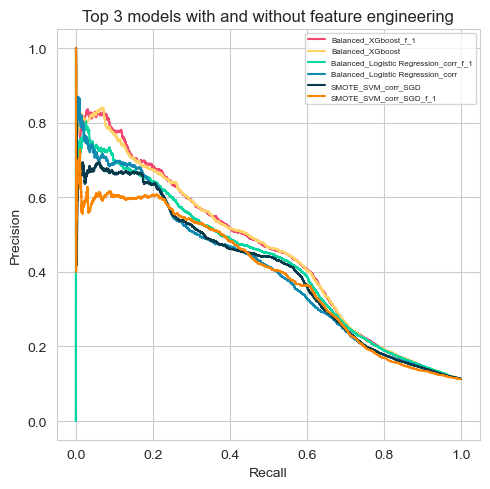

In [88]:
# Set the figure size
plt.figure(figsize = (5, 5))

# Plot the PR curves
for i, label_name in enumerate(pr_scores_f_1_sorted):
    plt.plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

plt.legend(loc='upper right', fontsize='xx-small')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Top 3 models with and without feature engineering')
plt.grid(True)

plt.tight_layout()
plt.show()

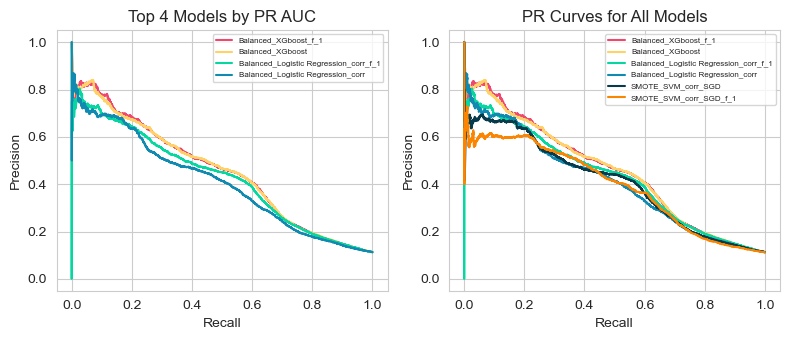

In [89]:
# Plot top 4 Pr curves and all the PR curve side by side
# Create subplots
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(8, 3.5))

# Plot top 4 models
for i, label_name in enumerate(pr_scores_f_1_sorted[0:4]):
    ax[0].plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

ax[0].legend(loc='upper right', fontsize='xx-small')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('Top 4 Models by PR AUC')
ax[0].grid(True)

# Plot all the models
for i, label_name in enumerate(pr_scores_f_1_sorted):
    ax[1].plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

ax[1].legend(loc='upper right', fontsize='xx-small')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('PR Curves for All Models')
ax[1].grid(True)

plt.tight_layout()
plt.show()


I will select the models **Balanced_XGboost_f1**, **Balanced_XGboost** and **Balanced_Logistic Regression_corr** as the top 3 models.

Although the AUC score of **Balanced_Logistic Regression_corr_f1** is higher than that of **Balanced_Logistic Regression_corr**, the precision-recall curve shows that Balanced_Logistic Regression_corr exhibits less fluctuation and appears more stable. Therefore, I prefer it over the Logistic Regression model with feature engineering.

In [90]:
# To store Balanced_XGboost_f1 to the result DataFrame and compare the f1 score slice the results from pr_scores_f_1_sorted
Balanced_XGboost_f1_result = pr_scores_f_1_sorted[0]
Balanced_XGboost_f1_result

{'label': 'Balanced_XGboost_f_1',
 'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.75510204, 0.8       ,
        1.        ]),
 'recall': array([1.        , 1.        , 1.        , ..., 0.01139163, 0.00492611,
        0.        ]),
 'auc': 0.45189812526090006,
 'best_f1': 0.4939149459372231,
 'best_threshold': 0.6083119}

In [91]:
# Convert the dictionary to a list and having the same structure of the DataFrame
Balanced_XGboost_f1_result_prep = [
    {
        'Model': 'XGBoost',
        'Type': 'balanced_tuned_f1',
        'F1_Score': Balanced_XGboost_f1_result['best_f1'],
        'Plot_label' : 'XGBoost_balanced_tuned_f1'
    }
]

# Convert the list to a DataFrame
Balanced_XGboost_f1_result_df = pd.DataFrame(Balanced_XGboost_f1_result_prep)

# Concatenate the DataFrame to result_df and drop any duplicates
results_df = pd.concat([results_df, Balanced_XGboost_f1_result_df], ignore_index=True)
results_df = results_df.drop_duplicates()

# Display the DataFrame
results_df


,Model,Type,F1_Score,Plot_label
0,Logistic Regression,Base,0.310206,Logistic Regression_Base
1,SVM,Base,0.273432,SVM_Base
2,Random Forest,Base,0.362800,Random Forest_Base
3,XGBoost,Base,0.374902,XGBoost_Base
4,Logistic Regression,balanced,0.372052,Logistic Regression_balanced
5,SVM,balanced,0.451117,SVM_balanced
6,Random Forest,balanced,0.349071,Random Forest_balanced
7,XGBoost,balanced,0.429441,XGBoost_balanced
8,Logistic Regression,SMOTE,0.383609,Logistic Regression_SMOTE
9,SVM,SMOTE,0.417530,SVM_SMOTE


In [92]:
# Slice top 3 models from the DataFrame
tuned_and_f1_models_t3 = results_df[((results_df['Model'] == 'XGBoost') & (results_df['Type'] == 'balanced_tuned_f1')) |
                                     ((results_df['Model'] == 'XGBoost') & (results_df['Type'] == 'balanced_tuned_1')) |
                                     ((results_df['Model'] == 'Logistic Regression') & (results_df['Type'] == 'balanced_corr_tuned_1'))
                                
                                    ]

tuned_and_f1_models_t3

,Model,Type,F1_Score,Plot_label
16,Logistic Regression,balanced_corr_tuned_1,0.454860,Logistic Regression_balanced_corr_tuned_1
17,XGBoost,balanced_tuned_1,0.494300,XGBoost_balanced_tuned_1
19,XGBoost,balanced_tuned_f1,0.493915,XGBoost_balanced_tuned_f1


In [93]:
# Check the top 5 F1 scores, just in case
top3_f1 = results_df.sort_values(by='F1_Score', ascending=False).head(5)
print(top3_f1)

                  Model                    Type  F1_Score  \
17              XGBoost        balanced_tuned_1  0.494300   
19              XGBoost       balanced_tuned_f1  0.493915   
18                  SVM  SMOTE_corr_SGD_tuned_1  0.476464   
16  Logistic Regression   balanced_corr_tuned_1  0.454860   
5                   SVM                balanced  0.451117   

                                   Plot_label  
17                   XGBoost_balanced_tuned_1  
19                  XGBoost_balanced_tuned_f1  
18                 SVM_SMOTE_corr_SGD_tuned_1  
16  Logistic Regression_balanced_corr_tuned_1  
5                                SVM_balanced  


Although SMOTE_corr_SGD_tuned_1 has a higher F1 score than the Logistic Regression model, the Logistic Regression model has higher AUC scores, so I'll select it over SMOTE_corr_SGD_tuned_1 because it indicates the model is more stable. But I'll include it in the following graph as a reference.

In [94]:
# Include the SMOTE_corr_SGD_tuned_1 to the top 3 models as a reference
tuned_and_f1_models_t3_and_svm = pd.concat([tuned_and_f1_models_t3,top3_f1.iloc[[2]]], ignore_index=True)
tuned_and_f1_models_t3_and_svm

,Model,Type,F1_Score,Plot_label
0,Logistic Regression,balanced_corr_tuned_1,0.454860,Logistic Regression_balanced_corr_tuned_1
1,XGBoost,balanced_tuned_1,0.494300,XGBoost_balanced_tuned_1
2,XGBoost,balanced_tuned_f1,0.493915,XGBoost_balanced_tuned_f1
3,SVM,SMOTE_corr_SGD_tuned_1,0.476464,SVM_SMOTE_corr_SGD_tuned_1


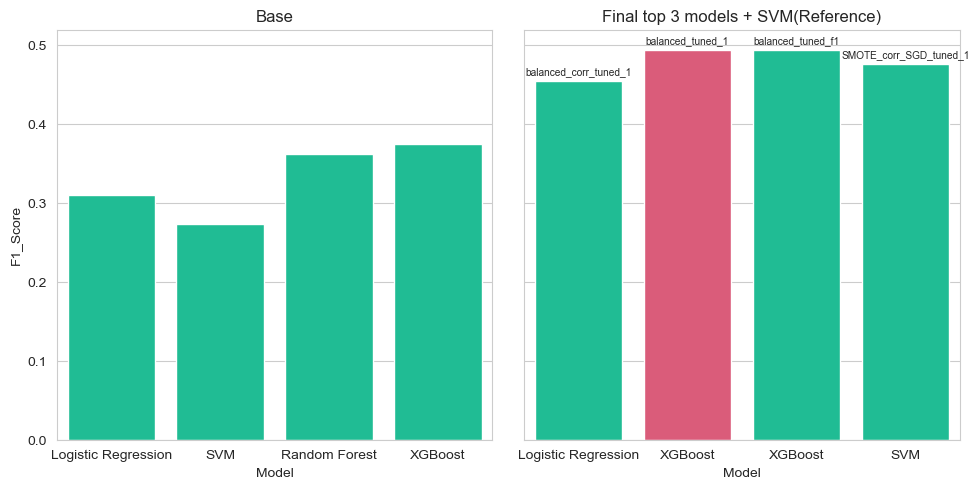

In [95]:
# Plot the models
# Define the grid and set the same ticks for y axis
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


# Plot the base models
sns.barplot(data=base_models, x='Model', y='F1_Score', ax=ax[0], color=palette_1[0])
ax[0].set_title('Base')

# Plot the final top 3 tuned models with SVM model as a reference
# Hight XGBoost_balanced_tuned_1 to help visualize the model selection (see the markdown below)
tuned_and_f1_models_t3_and_svm_palette = [palette_1[1] if m == 'XGBoost_balanced_tuned_1' else palette_1[0] for m in tuned_and_f1_models_t3_and_svm['Plot_label']]

sns.barplot(data=tuned_and_f1_models_t3_and_svm, x='Plot_label', y='F1_Score',ax=ax[1], hue='Plot_label', legend=False, palette=tuned_and_f1_models_t3_and_svm_palette)
ax[1].set_title('Final top 3 models + SVM(Reference)')
ax[1].set_xticks(range(len(tuned_and_f1_models_t3_and_svm)))
ax[1].set_xticklabels(tuned_and_f1_models_t3_and_svm['Model'])
ax[1].set_xlabel('Model')

# Annotate Type above each bar
for i, bar in enumerate(ax[1].patches):
    hight_t_f1_t3 = bar.get_height()
    model_type_t_f1_t3 = tuned_and_f1_models_t3_and_svm['Type'].iloc[i]
    ax[1].annotate(
        model_type_t_f1_t3,
        xy=(bar.get_x() + bar.get_width() / 2, hight_t_f1_t3),
        xytext=(0, 3),
        textcoords='offset points',
        ha = 'center',
        va ='bottom',
        fontsize=7.3
    )

plt.tight_layout()
plt.show()



**The best model: XGBoost_balanced_tuned**

**Reason:**

Among the top-performing models, the XGBoost variants achieved the best f1 scores with minimal performance differences between them. The XGBoost_balanced_tuned_f1 model includes additional features with feature engineering, while the XGBoost_balanced_tuned model relies only on the original features. Since both models perform similarly, I will select XGBoost_balanced_tuned as the final model. This version is more interpretable because it only uses original features.

**Now, I will examine which features are most influential in determining whether the customer takes the loan or not. To do this, I will analyze feature contributions in the best model using feature importance and SHAP values.**

In [96]:
# Get the best model from the cross validation
# Import libraries 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import clone

# Create empty lists to store results
fold_models = []
fold_scores = []
fold_indices = []

# Run manual cross validation to find out the best model
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

# Clone the pipe line and train the model
    model = clone(PR_curve_selected_models['Balanced_XGboost'])
    model.fit(X_tr, y_tr)

# Predict on validation
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_proba >= top3_threshold_f1_auc_tuned['Balanced_XGboost']['best_threshold']).astype('int')

# Calculate F1 score
    f1_best_val = f1_score(y_val, y_pred)

# Store
    fold_models.append(model)
    fold_scores.append(f1_best_val)
    fold_indices.append((train_idx, val_idx))

# Get the best model
best_fold = np.argmax(fold_scores)
best_model = fold_models[best_fold]
best_val_index = fold_indices[best_fold][1]
X_val_best = X_train.iloc[best_val_index]
y_val_best = y_train.iloc[best_val_index]

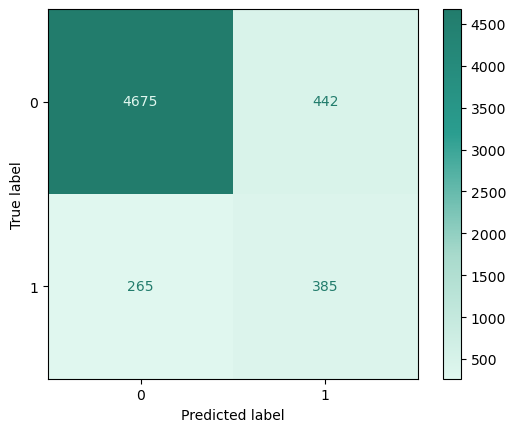

In [97]:
# Apply the model to the validation set and get the prediction
y_probs_best = best_model.predict_proba(X_val_best)[:,1]
y_pred_best = (y_probs_best >= top3_threshold_f1_auc_tuned['Balanced_XGboost']['best_threshold']).astype(int)

# Check the confusion matrix
# Temporarily disable global Seaborn Style to render a cleaner confusion matrix
with plt.style.context('default'):
    cm = confusion_matrix(y_val_best, y_pred_best)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=cmap)

    plt.show()

In [98]:
# Plot the feature importance
# Only pick top 20 features
# Import a library
from xgboost import plot_importance

# Get the best model
booster = best_model.named_steps['model'].get_booster()

# XGBoost provides a built-in plot_importance method, but it only shows generic names like 'f0', 'f1' etc
# Therefore, I extract raw feature importance and manually assign the correct feature names.
# Extract feature names 
feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()

# Check feature_names
print(feature_names)



['num__age' 'num__campaign' 'num__pdays' 'num__previous'
 'num__emp.var.rate' 'num__cons.price.idx' 'num__cons.conf.idx'
 'num__euribor3m' 'num__nr.employed' 'cat__job_admin.'
 'cat__job_blue-collar' 'cat__job_entrepreneur' 'cat__job_housemaid'
 'cat__job_management' 'cat__job_retired' 'cat__job_self-employed'
 'cat__job_services' 'cat__job_student' 'cat__job_technician'
 'cat__job_unemployed' 'cat__job_unknown' 'cat__marital_divorced'
 'cat__marital_married' 'cat__marital_single' 'cat__marital_unknown'
 'cat__education_basic.4y' 'cat__education_basic.6y'
 'cat__education_basic.9y' 'cat__education_high.school'
 'cat__education_illiterate' 'cat__education_professional.course'
 'cat__education_university.degree' 'cat__education_unknown'
 'cat__default_no' 'cat__default_unknown' 'cat__default_yes'
 'cat__housing_no' 'cat__housing_unknown' 'cat__housing_yes'
 'cat__loan_no' 'cat__loan_unknown' 'cat__loan_yes'
 'cat__contact_cellular' 'cat__contact_telephone' 'cat__month_apr'
 'cat__month_a

In [99]:
# Get raw feature importance
importance_score = booster.get_score(importance_type='gain')

# Check score_dict
pprint(importance_score)

{'f0': 6.125926971435547,
 'f1': 6.568449020385742,
 'f10': 3.738877773284912,
 'f11': 5.086130142211914,
 'f12': 5.214047908782959,
 'f13': 4.34011697769165,
 'f14': 13.950248718261719,
 'f15': 3.8698368072509766,
 'f16': 4.1302385330200195,
 'f17': 4.598871231079102,
 'f18': 4.154651641845703,
 'f19': 3.7662127017974854,
 'f2': 24.60879135131836,
 'f20': 3.9917283058166504,
 'f21': 5.896353244781494,
 'f22': 4.766539573669434,
 'f23': 5.470709323883057,
 'f24': 7.03631591796875,
 'f25': 4.488583087921143,
 'f26': 6.594820022583008,
 'f27': 4.717015743255615,
 'f28': 4.8962507247924805,
 'f3': 5.523238182067871,
 'f30': 5.787914752960205,
 'f31': 5.540120601654053,
 'f32': 5.116954326629639,
 'f33': 10.675537109375,
 'f34': 9.302032470703125,
 'f36': 4.045374393463135,
 'f37': 5.343079566955566,
 'f38': 7.164076328277588,
 'f39': 4.691960334777832,
 'f4': 20.97132682800293,
 'f41': 5.295525550842285,
 'f42': 10.838685989379883,
 'f44': 2.6626715660095215,
 'f45': 1.4499473571777344,
 

In [100]:
# Correct the feature name and save it as a DataFrame
importance_df = pd.DataFrame(
    {
        'feature': [feature_names[int(f[1:])] for f in importance_score],
        'importance': [i for i in importance_score.values()]
    }
)

# Check the DataFrame
print(importance_df)

                               feature  importance
0                             num__age    6.125927
1                        num__campaign    6.568449
2                           num__pdays   24.608791
3                        num__previous    5.523238
4                    num__emp.var.rate   20.971327
5                  num__cons.price.idx   24.309898
6                   num__cons.conf.idx   60.799446
7                       num__euribor3m   10.408251
8                     num__nr.employed  962.339966
9                      cat__job_admin.    4.409729
10                cat__job_blue-collar    3.738878
11               cat__job_entrepreneur    5.086130
12                  cat__job_housemaid    5.214048
13                 cat__job_management    4.340117
14                    cat__job_retired   13.950249
15              cat__job_self-employed    3.869837
16                   cat__job_services    4.130239
17                    cat__job_student    4.598871
18                 cat__job_tec

In [101]:
# Sort the DataFrame to get the top 20 feature importance
importance_df_sorted = importance_df.sort_values(by='importance', ascending=False)

# Slice the DataFrame to get the top 20 feature importance
importance_df_top_20 = importance_df_sorted.iloc[:20]

# Check the importance_df_top_20
print(importance_df_top_20)

                    feature  importance
8          num__nr.employed  962.339966
6        num__cons.conf.idx   60.799446
56    cat__poutcome_success   42.725029
48           cat__month_oct   34.707539
2                num__pdays   24.608791
5       num__cons.price.idx   24.309898
4         num__emp.var.rate   20.971327
55    cat__poutcome_failure   18.115484
14         cat__job_retired   13.950249
39    cat__contact_cellular   10.838686
32          cat__default_no   10.675537
7            num__euribor3m   10.408251
33     cat__default_unknown    9.302032
51     cat__day_of_week_mon    8.453485
36         cat__housing_yes    7.164076
52     cat__day_of_week_thu    7.136080
24     cat__marital_unknown    7.036316
26  cat__education_basic.6y    6.594820
1             num__campaign    6.568449
53     cat__day_of_week_tue    6.516693


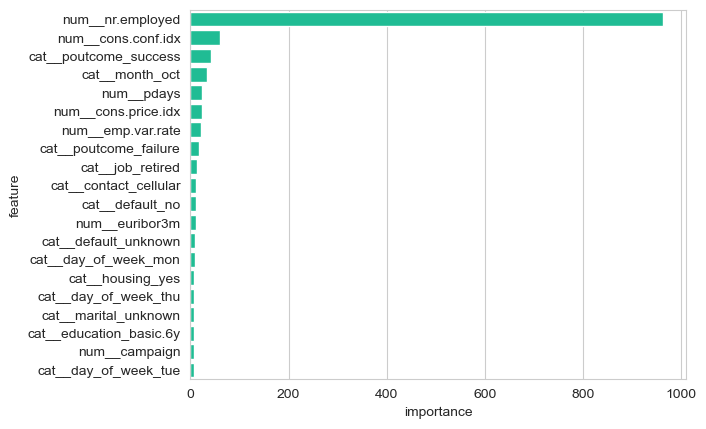

In [102]:
# Plot the top 20 feature importance
sns.barplot(data=importance_df_top_20, x='importance', y='feature', orient='y', color=palette_1[0])
plt.show()

It can be seen that num_nr.employed has a disproportionately large influence on the prediction. However, this makes it difficult to compare the importance of the other features. Therefore, I plot a graph without num_nr.employed to better visualize and compare the remaining features.

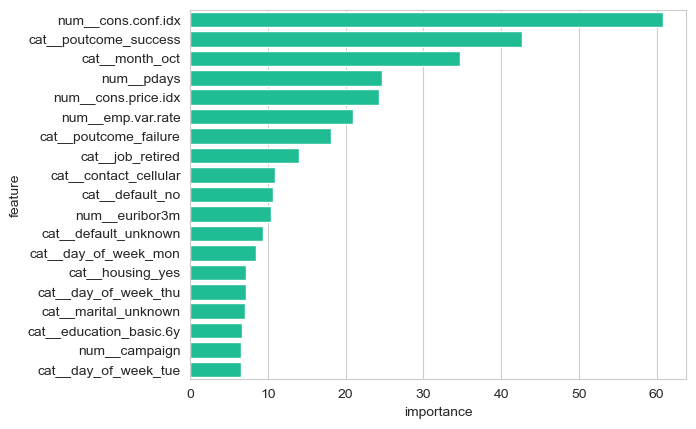

In [103]:
# Plot the top 19 importance (Without num_nr.employed )
sns.barplot(data=importance_df_top_20.iloc[1:], x='importance', y='feature', orient='y', color=palette_1[0])
plt.show()

Based on the feature importance, the model relies most heavily on **nr.employed** which is a macroeconomic indicator reflecting the overall employment level. This is followed by **consumer confidence**, another macroeconomic indicator that captures how optimistic consumers feel about the economy.

Apart from these uncontrollable macroeconomic indicators, the model places significant weight on whether **the contact was made in October** and whether the customer had **a successful outcome in a previous marketing campaign**.



In [104]:
# Import SHAP
import shap 

# Get transformed data
X_val_transformed = best_model.named_steps['preprocessing'].transform(X_val_best)

# Create the SHAP explainer for the tree model
explainer = shap.TreeExplainer(booster, X_val_transformed)

# Compute SHAP values
shap_values = explainer(X_val_transformed)

# Assign the correct feature names
shap_values.feature_names = feature_names

 99%|===================| 5723/5767 [00:36<00:00]        

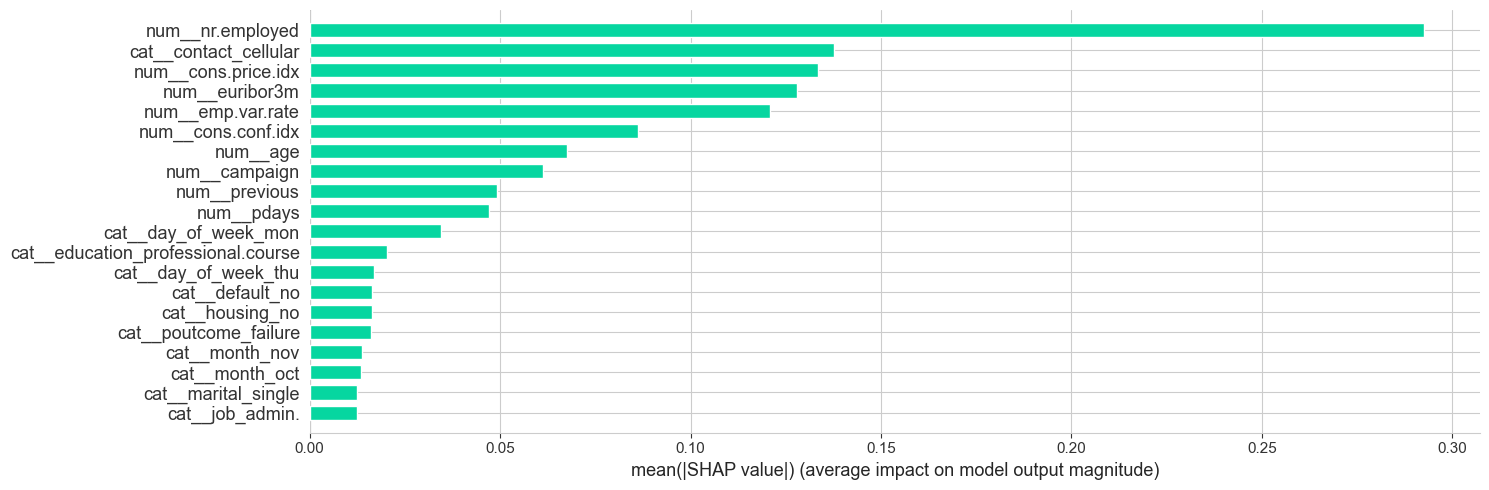

In [105]:
# Show the global SHAP summary bar plot (average importance)
plt.figure(figsize=(30, 10))
shap.summary_plot(shap_values, X_val_transformed, max_display = 20, plot_type='bar', plot_size=(15, 5), color=palette_1[0])

Although the average SHAP importance appears similar to the feature importance before, there are some differences. To see them clearly let's plot the graphs side by side. 

The figure layout has changed to tight


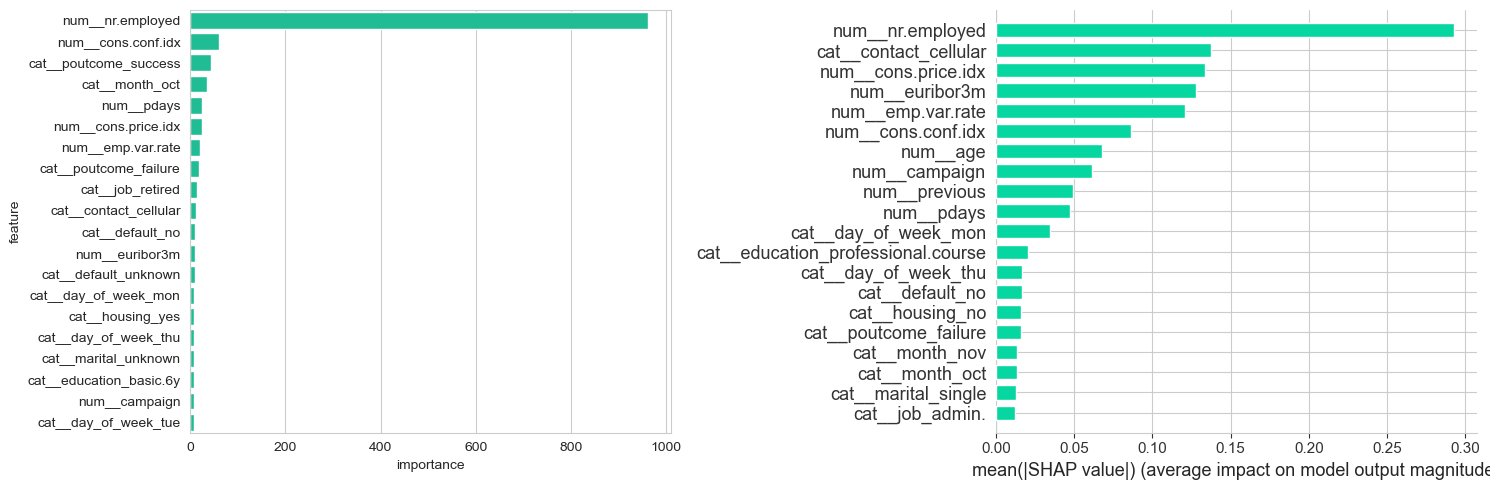

In [106]:
# Create grids
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot feature importance
sns.barplot(data=importance_df_top_20, x='importance', y='feature', orient='y', ax=axes[0], color=palette_1[0])

# Plot the SHAP plot
plt.sca(axes[1])
shap.summary_plot(shap_values, X_val_transformed, max_display = 20, plot_type='bar', plot_size=(15, 5), show=False, color=palette_1[0])

# Set the layout and show the plot
plt.tight_layout()
plt.show()

Although both plots highlight num_nr.employed as the most important feature, SHAP shows different insights compared to the feature importance. For example, features like cat_contact_cellular and num_cons_price.idx have relatively low feature importance, but rank higher in SHAP. This indicates that while they may not contribute large impurity reductions at each split, these features consistently influence predictions across many instances. 

This comparison illustrates how SHAP can reveal meaningful patterns that traditional feature importance might overlook, especially for features with smaller impurity reductions at each split, but a consistent impact on prediction.

Another difference between SHAP and traditional feature importance is that SHAP can plot the influence of feature with direction. I'm going to investigate it below.

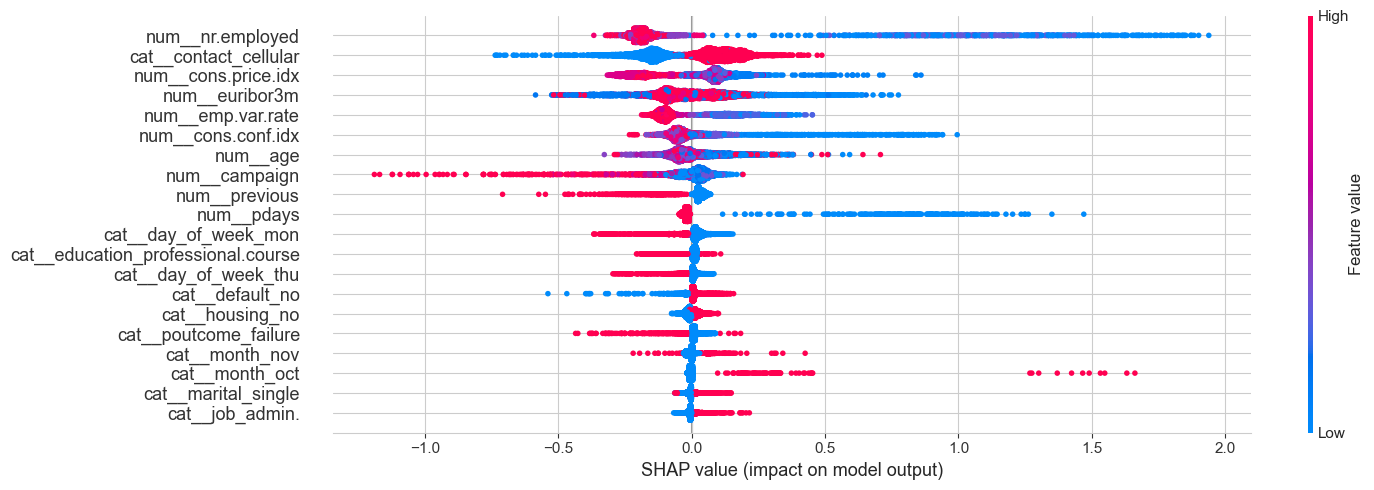

In [107]:
# Show the global SHAP summary with a swarm plot (spread and direction)
plt.figure(figsize=(20, 5))
shap.summary_plot(shap_values, X_val_transformed, max_display = 20, plot_size=(15, 5))

While the previous bar plot showed average impact, the SHAP swarm plot adds directional influence. Each dot represents a SHAP value for a single instance at each feature, colored by that feature's value. (blue = low, red = high)

According to this plot, 
1. **num_nr.employed**

    This is a macroeconomic indicator. (number of employees) Low values push prediction upward, enhancing the probability of a positive outcome - meaning the client subscribed to a term deposit. This could indicate either there is more marketing activity, clients are more likely to subscribe or both when there is low employment that often signals economic instability.
    When it comes to the amount of marketing activity, it can be clarified with the marketing team.

2. **cat_contact_cellular**

   Red (presence of mobile contact) pushes predictions upward, indicating its strong positive effect. This highlights the effectiveness of mobile outreach in campaign success.

3. **num_cons.price.idx**

   This is a macroeconomic indicator that reflects inflation trends. High values push prediction downward, lowering the probability of a positive outcome. This could indicate that rising cost of living negatively affects customers' willingness to subscribe to the term deposit.

4. **num_cons.conf.idx**

   This is a macroeconomic indicator that measures how optimistic or pessimistic consumers are. Low values push prediction upward, enhancing the probability of a positive outcome, which means low consumer confidence  positively influences customers' willingness to subscribe to the term deposit. This could indicate a preference for secure investments in uncertain times.

5. **num_campaign**

   Interestingly, high numbers of contacts during the current campaign push the prediction down and reduce the probability of a positive outcome.

6. **num_previous**

   This is the number of contacts before this campaign. High numbers of contacts during the current campaign push the prediction down and lower the probability of a positive outcome.

7. **num_pdays**

   This is how many days ago the client was contacted before this current campaign. Low values push the prediction up and lead to the higher possibility of getting a positive outcome - possibly because the client still remembers the previous interaction better.

It's also worth investigating the SHAP values for cases that the model predicts correctly (TP) since the model's F1 score is not very high (0.5). This is another advantage of SHAP - it allows for detailed inspection at the instance level. I will also show FP / TN / FN cases as references.

In [108]:
# Convert the y_val_best an numpy array 
y_true = y_val_best.values

# Create masks for TP, FP, TN, FN
tp_idx = (y_true == 1) & (y_pred_best == 1)
fp_idx = (y_true == 0) & (y_pred_best == 1)
tn_idx = (y_true == 0) & (y_pred_best == 0)
fn_idx = (y_true == 1) & (y_pred_best == 0)

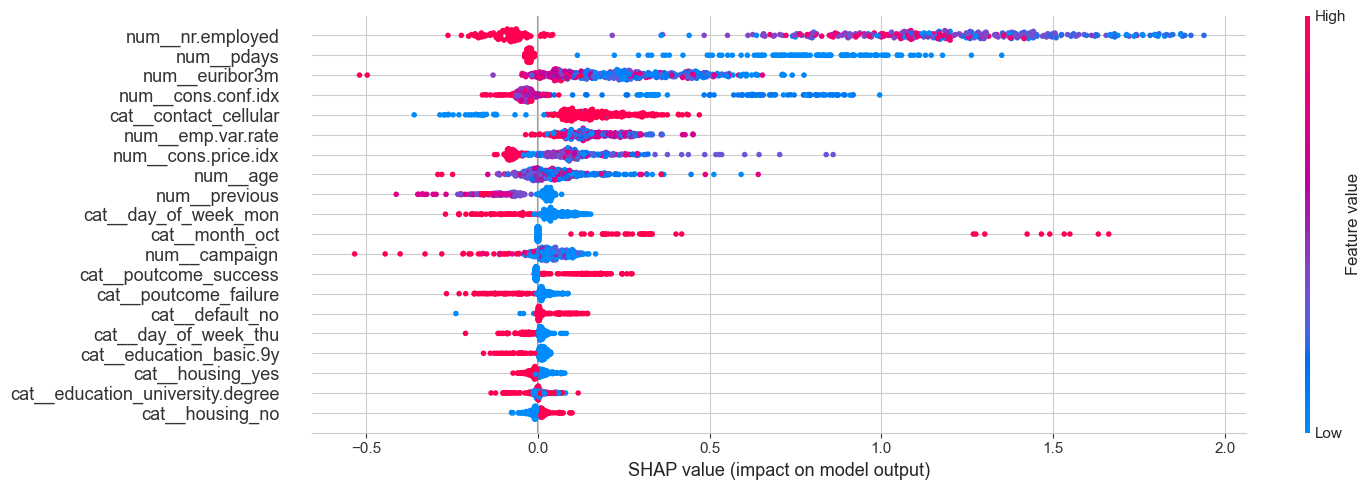

In [109]:
# Show the global SHAP summary of TP
plt.figure(figsize=(20, 5))
shap.summary_plot(shap_values[tp_idx], X_val_transformed[tp_idx], max_display=20, plot_size=(15, 5))

This SHAP swarm plot shows the cases where the model correctly predicted the positive class. (TP)

1. **num_nr.employed**

   While this feature strongly influences the model to predict positive outcomes,  the association between its high and low values and the direction of the prediction is not clearly visible. Therefore, it is difficult to interpret and may not be reliable as a predictor on its own.

2. **num_pdays**
   Low values are clearly associated with higher probability of positive outcomes, possibly indicating that recent contact increases the chance of a client subscription.

3. **num_cons.conf.idx**
   Low values are associated with higher probability of positive outcomes. This means when consumer confidence is low, clients may be more inclined to subscribe.

4. **cat_contact_cellular**
   The presence of mobile contact pushes predictions upward, indicating a strong positive effect. This highlights the effectiveness of mobile outreach in campaign success.

5. **cat_day_of_week_mon**  
   Not contacting on Monday pushes the prediction upward.

6. **cat_month_oct**
   Contacting on October pushes the prediction upward.

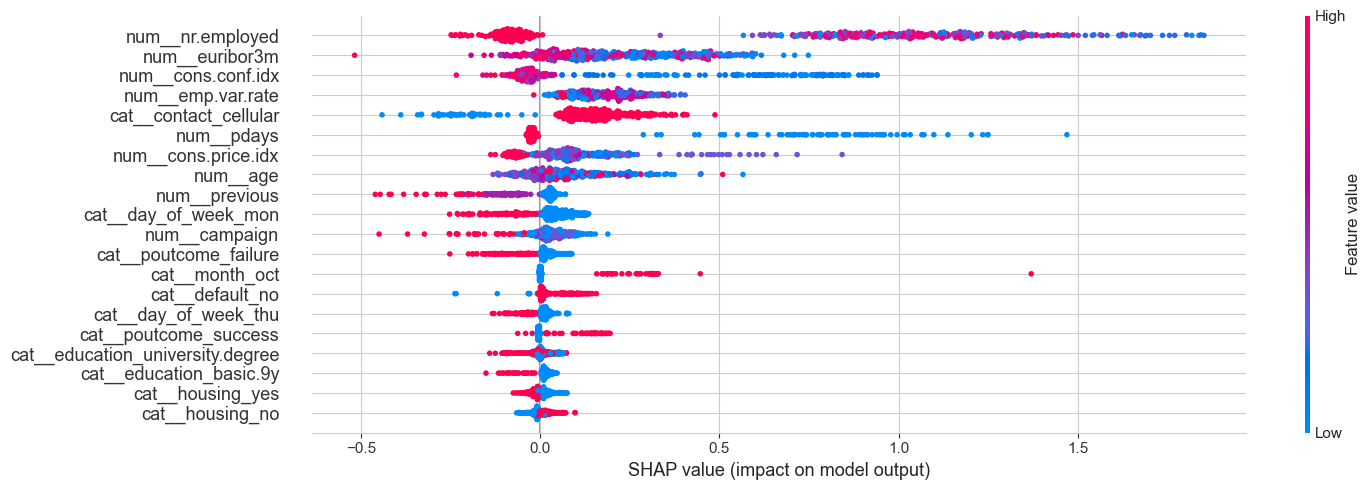

In [110]:
# Show the global SHAP summary of FP
plt.figure(figsize=(20, 5))
shap.summary_plot(shap_values[fp_idx], X_val_transformed[fp_idx], max_display=20, plot_size=(15, 5))

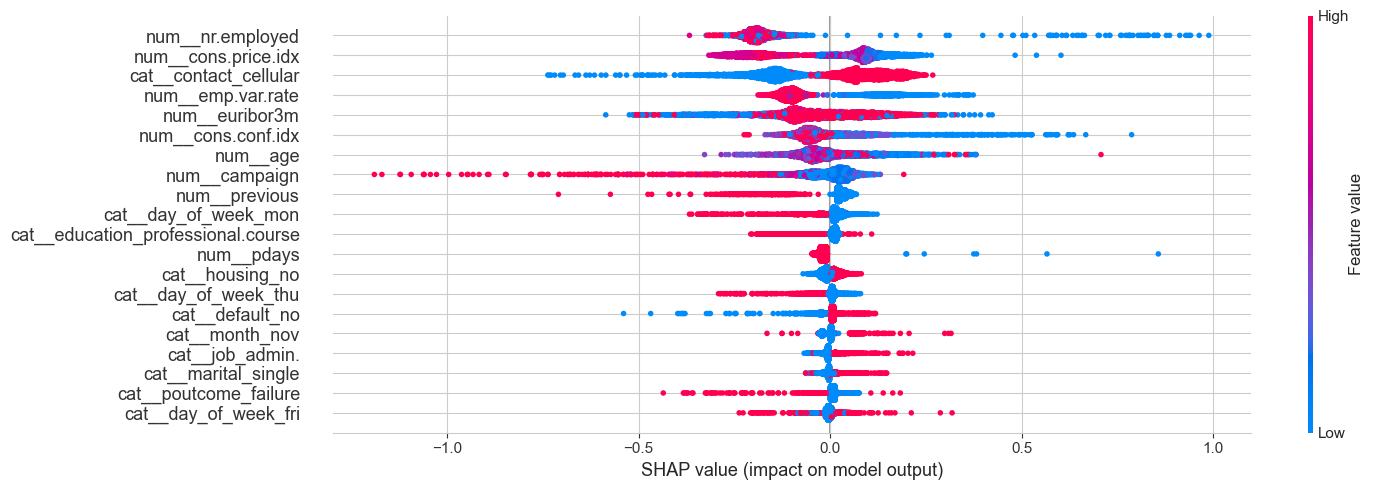

In [111]:
# Show the global SHAP summary of TN
plt.figure(figsize=(20, 5))
shap.summary_plot(shap_values[tn_idx], X_val_transformed[tn_idx], max_display=20, plot_size = (15, 5))

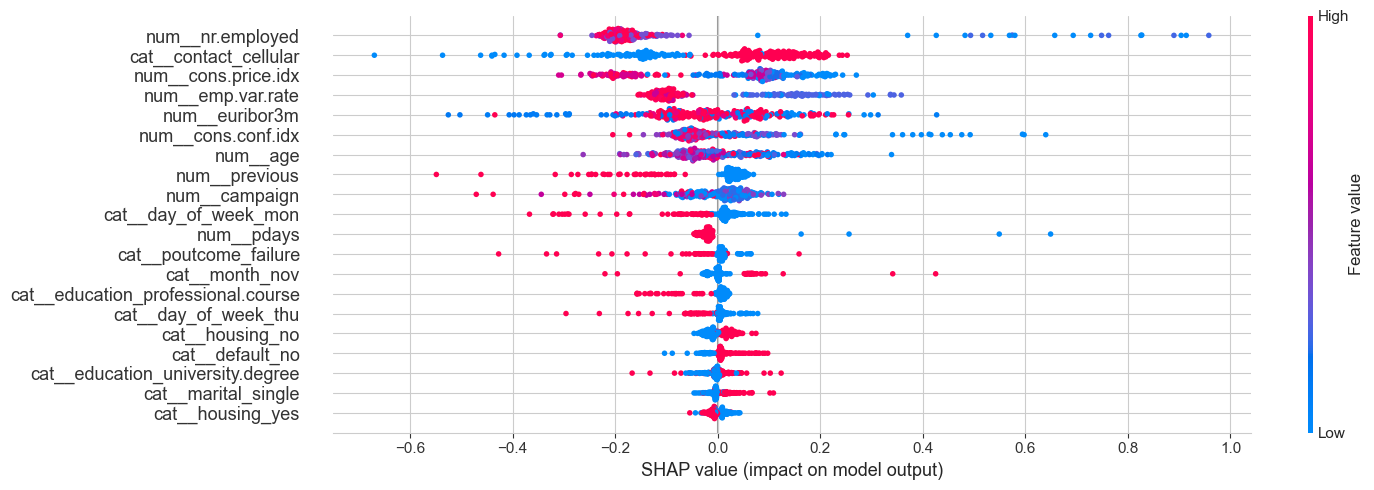

In [112]:
# Show the global SHAP summary of FN
plt.figure(figsize=(20, 5))
shap.summary_plot(shap_values[fn_idx], X_val_transformed[fn_idx], max_display=20, plot_size=(15, 5))

**Apply the model to the test set**

In [113]:
# Apply the model to test set and get the prediction
y_probs_best_test = best_model.predict_proba(X_test)[:,1]
y_pred_best_test = (y_probs_best_test >= top3_threshold_f1_auc_tuned['Balanced_XGboost']['best_threshold']).astype(int)

f1_test = f1_score(y_test, y_pred_best_test )
print(f1_test)

0.5190156599552572


In [114]:
# Create a dictionary of a list for the test set performance
Balance_XGBoost_test_result = [
    {
        'Model': 'XGBoost',
        'Type': 'Test',
        'F1_Score': f1_test,
        'Plot_label': 'XGBoost_Test'
    }
]

# Convert it to DataFrame
Balanced_XGBoost_test_result_df = pd.DataFrame(Balance_XGBoost_test_result)

# Add it to results_df
results_df = pd.concat([results_df, Balanced_XGBoost_test_result_df], ignore_index=True)
results_df = results_df.drop_duplicates()

print(results_df )

                  Model                    Type  F1_Score  \
0   Logistic Regression                    Base  0.310206   
1                   SVM                    Base  0.273432   
2         Random Forest                    Base  0.362800   
3               XGBoost                    Base  0.374902   
4   Logistic Regression                balanced  0.372052   
5                   SVM                balanced  0.451117   
6         Random Forest                balanced  0.349071   
7               XGBoost                balanced  0.429441   
8   Logistic Regression                   SMOTE  0.383609   
9                   SVM                   SMOTE  0.417530   
10        Random Forest                   SMOTE  0.384880   
11              XGBoost                   SMOTE  0.384516   
12  Logistic Regression              SMOTE_corr  0.407564   
13                  SVM              SMOTE_corr  0.434230   
14  Logistic Regression           balanced_corr  0.411068   
15                  SVM 

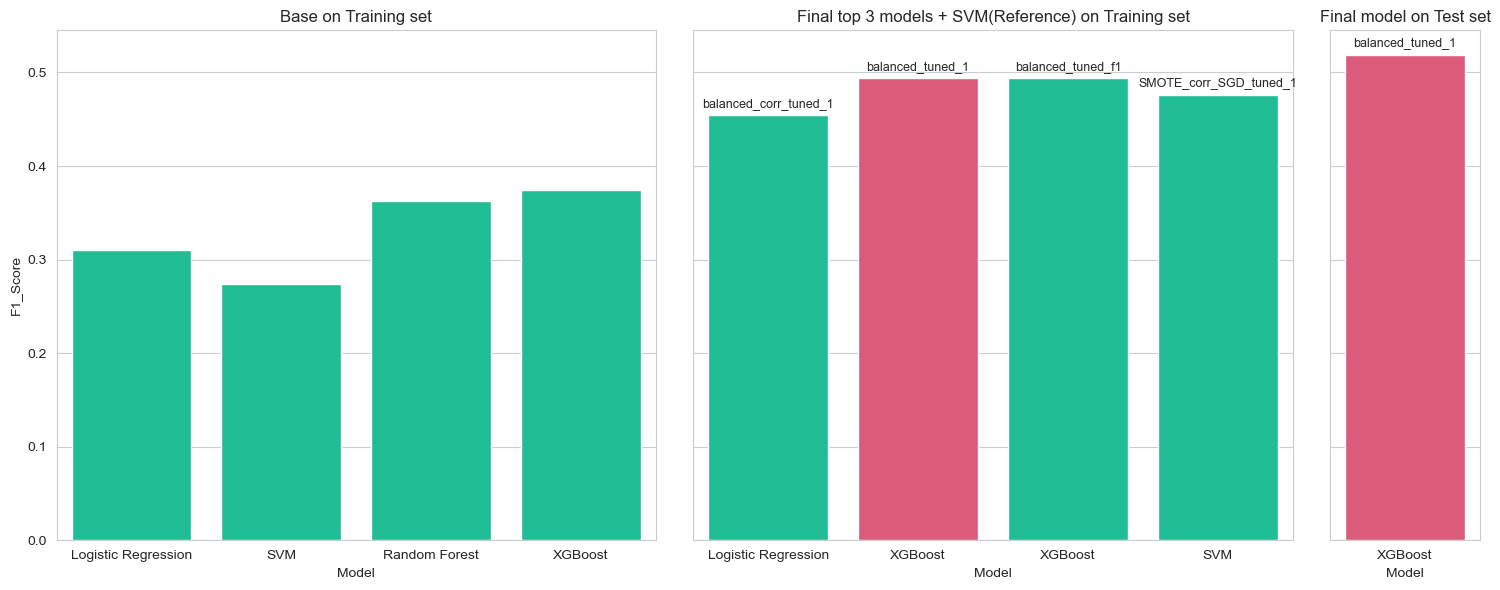

In [115]:
# Plot a graph
# Set the grids
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True, gridspec_kw={'width_ratios': [4, 4, 1]})

# Plot the base models
sns.barplot(data=base_models, x='Model', y='F1_Score', ax=axes[0], color=palette_1[0])
axes[0].set_title('Base on Training set')

# Plot the top models in cv set
# Hight XGBoost_balanced_tuned_1 to help visualize the model selection 
sns.barplot(data=tuned_and_f1_models_t3_and_svm, x='Plot_label', y='F1_Score',ax=axes[1], hue='Plot_label', legend=False, palette=tuned_and_f1_models_t3_and_svm_palette)
axes[1].set_title('Final top 3 models + SVM(Reference) on Training set')
axes[1].set_xticks(range(len(tuned_and_f1_models_t3_and_svm)))
axes[1].set_xticklabels(tuned_and_f1_models_t3_and_svm['Model'])
axes[1].set_xlabel('Model')

# Annotate Type above each bar
for i, bar in enumerate(axes[1].patches):
    hight_t_f1_t3 = bar.get_height()
    model_type_t_f1_t3 = tuned_and_f1_models_t3_and_svm['Type'].iloc[i]
    axes[1].annotate(
        model_type_t_f1_t3,
        xy=(bar.get_x() + bar.get_width() / 2, hight_t_f1_t3),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Plot the top models in cv set
sns.barplot(data=results_df[results_df['Type'] == 'Test'], x='Model', y='F1_Score', ax=axes[2], color=palette_1[1])
axes[2].set_title('Final model on Test set')

# Annotate the Type of XGBoost model on top of the bar
axes[2].annotate(
    results_df[results_df['Plot_label'] == 'XGBoost_balanced_tuned_1']['Type'].iloc[0],
    xy=(axes[2].patches[0].get_x() + axes[2].patches[0].get_width() / 2, axes[2].patches[0].get_height()),
    xytext=(0, 3),
    textcoords='offset points',
    ha='center',
    va='bottom',
    fontsize=9
)

plt.tight_layout()
plt.show()

**Conclusion and Test Set Performance**

After experimenting with multiple models and tuning techniques, the XGBoost classifier with the balanced_tuned model emerged as the most effective and interpretable, achieving **an F1-score of 0.493 on the train set** and **0.519 on the test set.** This indicates solid performance for this imbalanced classification problem, especially compared to baseline models.

**Highlights:**
1. Model enhancements such as hyperparameter tuning with Bayesian Search, SMOTE and class balancing significantly improved F1 scores across the models.
2. XGBoost outperformed other models in the train set and remained stable on the test set.
3. SHAP analysis provided valuable insights by highlighting which features influence predictions.

While performance is not perfect, the model offers a strong foundation. That being said, it's important to consult with the marketing team to assess whether the SHAP-derived insights align with domain knowledge before taking action based on the model. Additionally, collaborating with the team to identify new features that may influence marketing performance could improve the model further and help refine focus areas for future campaigns.


**Deployment**

**Output the best model**

The model will be loaded by the FASTAPI backend to make predictions. (Frontend Streamlit)

In [116]:
import joblib

output_path = Path('app') / 'bankmarketing_best_model.pkl'

if not output_path.exists():
    joblib.dump(best_model, output_path)
    print(f'The best model has been saved to {output_path}')

else:
    print(f'The best model has already been saved at {output_path}')

The best model has already been saved at app\bankmarketing_best_model.pkl


In [117]:
# Output the best threshold for the model
# Define the path
output_path_threshold = Path('app') / 'bankmarketing_best_model_best_threshold.json'

# Get the best threshold
# First create the results for the model
results_dic = top3_threshold_f1_auc_tuned['Balanced_XGboost']

# Check the dictionary
print(results_dic)

{'best_threshold': 0.6007459, 'best_f1': 0.4942996742178013, 'auc': 0.45077108411981326}


In [118]:
# Slice only the best threshold
# The number is float32, which is not JSON serializable. Therefor, convert the number as well
threshold_dic = {k: round(float(v), 7) for k, v in results_dic.items() if k == 'best_threshold'}

# Check the dictionary
print(threshold_dic)

{'best_threshold': 0.6007459}


In [119]:
# Save it if the file
# If the data has already saved, don't save it
# Otherwise, save it
if not output_path_threshold.exists():
    with open(output_path_threshold, 'w') as fh:
        json.dump(threshold_dic, fh)
    print(f'The best threshold has been saved to {output_path_threshold}')

else:
    print(f'The best threshold has already been saved at {output_path_threshold}')

The best threshold has already been saved at app\bankmarketing_best_model_best_threshold.json


**Create a simplified 4 features demo input**


This model uses 19 features and it might be a hassle to enter all 19 inputs for some users. Therefore, I will make a simplified demo version that users only have to enter 4 features.


The features were selected based on SHAP analysis of the TP set above.

The features are selected because:

1. Having consistent and directional SHAP impact.
2. Showing meaningful variation in correctly predicted positive cases.

To create a realistic demo, I use a borderline sample so that users can see the impacts of the features.

In [120]:
# Get the threshold
threshold =  results_dic['best_threshold']
margin = 0.03

# Find out the borderline samples form positive cases
borderline_mask = (
    (y_pred_best == 1) &
    (y_probs_best > threshold) &
    (y_probs_best < threshold + margin)
)

borderline_customers = X_val_best[borderline_mask]

# Sample one row to use for demo input
demo_sample = borderline_customers.sample(1, random_state=42)

# Check the sliced feature
print(borderline_customers)
 

       age            job   marital            education  default housing  \
28077   31         admin.   married    university.degree       no      no   
29243   33  self-employed    single    university.degree       no     yes   
38167   32         admin.   married    university.degree       no     yes   
35966   34     technician    single  professional.course       no      no   
35981   28  self-employed    single    university.degree       no      no   
30557   54    blue-collar   married             basic.4y       no      no   
37734   64        retired   married    university.degree       no     yes   
30334   73        retired   married    university.degree       no     yes   
36416   24        unknown    single    university.degree       no      no   
34407   31    blue-collar   married             basic.6y  unknown      no   
35017   30   entrepreneur   married          high.school       no     yes   
39368   58       services   married          high.school       no      no   

In [121]:
# Save the row
# Define the path
demo_sample_path = Path('streamlit_app') / 'default_demo_input_full.json'

# Save the whole row
# If the data has already been saved, don't save it
# Otherwise, save it
if not demo_sample_path.exists():
    demo_sample.to_json(demo_sample_path, orient='records')
    print(f'The full sample data has been saved to {demo_sample_path }')

else:
    print(f'The full sample data has been already saved at {demo_sample_path}')

The full sample data has been already saved at streamlit_app\default_demo_input_full.json


In [122]:
# Save the row without the selected 4 features
# These feature will be entered manually by the user in the Streamlit app
# Slice the row
demo_sample_dropped_5 = demo_sample.drop(['pdays','contact', 'month', 'day_of_week'], axis=1)

# Define the path
demo_sample_dropped_5_path = Path('streamlit_app') / 'default_demo_input_dropped_5.json'

# If the data has already been saved, don't save it
# Otherwise, save it
if not demo_sample_dropped_5_path.exists():
    demo_sample_dropped_5.to_json(demo_sample_dropped_5_path, orient='records')
    print(f'The dropped 5 sample data has been saved to {demo_sample_dropped_5_path }')

else:
    print(f'The dropped 5 sample data has been already saved at {demo_sample_dropped_5_path}')

The dropped 5 sample data has been already saved at streamlit_app\default_demo_input_dropped_5.json


In [123]:
# For the full input demo, create a dictionary of categorical columns and their unique values
# These are used to make dropdown menus in the app.
# Create a copy of df 
df_demo = df.copy()

# Create an empty dictionary to assign the categorical columns' names and its unique values
cat_dic_unique = {}

# Get the unique values from the categorical columns and save them in the dictionary
for col_cat in df_demo.select_dtypes(include='object').columns:
    cat_dic_unique[col_cat] = df_demo[col_cat].unique().tolist()

# Check the dictionary
pprint(cat_dic_unique)

{'contact': ['telephone', 'cellular'],
 'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri'],
 'default': ['no', 'unknown', 'yes'],
 'education': ['basic.4y',
               'high.school',
               'basic.6y',
               'basic.9y',
               'professional.course',
               'unknown',
               'university.degree',
               'illiterate'],
 'housing': ['no', 'yes', 'unknown'],
 'job': ['housemaid',
         'services',
         'admin.',
         'blue-collar',
         'technician',
         'retired',
         'management',
         'unemployed',
         'self-employed',
         'unknown',
         'entrepreneur',
         'student'],
 'loan': ['no', 'yes', 'unknown'],
 'marital': ['married', 'single', 'divorced', 'unknown'],
 'month': ['may',
           'jun',
           'jul',
           'aug',
           'oct',
           'nov',
           'dec',
           'mar',
           'apr',
           'sep'],
 'poutcome': ['nonexistent', 'failure', 'success']

In [124]:
# Drop the target value from the dictionary
cat_dic_unique.pop('y', None)

# Check the dictionary
pprint(cat_dic_unique)

{'contact': ['telephone', 'cellular'],
 'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri'],
 'default': ['no', 'unknown', 'yes'],
 'education': ['basic.4y',
               'high.school',
               'basic.6y',
               'basic.9y',
               'professional.course',
               'unknown',
               'university.degree',
               'illiterate'],
 'housing': ['no', 'yes', 'unknown'],
 'job': ['housemaid',
         'services',
         'admin.',
         'blue-collar',
         'technician',
         'retired',
         'management',
         'unemployed',
         'self-employed',
         'unknown',
         'entrepreneur',
         'student'],
 'loan': ['no', 'yes', 'unknown'],
 'marital': ['married', 'single', 'divorced', 'unknown'],
 'month': ['may',
           'jun',
           'jul',
           'aug',
           'oct',
           'nov',
           'dec',
           'mar',
           'apr',
           'sep'],
 'poutcome': ['nonexistent', 'failure', 'success']

In [125]:
# Save the dictionary
# Define the path
full_demo_cat_path = Path('streamlit_app') / 'full_demo_cat.json'

# If the data has already been saved, don't save it.
# Otherwise save it
if not full_demo_cat_path.exists():
    with open(full_demo_cat_path, 'w') as fh:
        json.dump(cat_dic_unique, fh, indent=4)
    print(f'A dictionary of categorical columns and their unique values has been saved to {full_demo_cat_path}')

else:
    print(f'A dictionary of categorical columns and their unique values has already been saved in {full_demo_cat_path}')

A dictionary of categorical columns and their unique values has already been saved in streamlit_app\full_demo_cat.json


In [126]:
# Create an empty dictionary to save numerical columns' names and their minimum and max values for the full demo
# These are used to make sliders in the app
num_dic_minmax = {}

# Get the numerical columns' names and there minimum and max values and assign them to the dictionary
for col_num in df_demo.select_dtypes(exclude='object').columns:
    num_dic_minmax[col_num] = [df_demo[col_num].min(), df_demo[col_num].max()]

# Check the dictionary
pprint(num_dic_minmax)

{'age': [17, 98],
 'campaign': [1, 56],
 'cons.conf.idx': [-50.8, -26.9],
 'cons.price.idx': [92.201, 94.767],
 'duration': [0, 4918],
 'emp.var.rate': [-3.4, 1.4],
 'euribor3m': [0.634, 5.045],
 'nr.employed': [4963.6, 5228.1],
 'pdays': [0, 999],
 'previous': [0, 7]}


In [127]:
# Duration is not used in the model. Therefore delete it form the dictionary
num_dic_minmax.pop('duration', None)

# Check the dictionary
pprint(num_dic_minmax)

{'age': [17, 98],
 'campaign': [1, 56],
 'cons.conf.idx': [-50.8, -26.9],
 'cons.price.idx': [92.201, 94.767],
 'emp.var.rate': [-3.4, 1.4],
 'euribor3m': [0.634, 5.045],
 'nr.employed': [4963.6, 5228.1],
 'pdays': [0, 999],
 'previous': [0, 7]}


In [128]:
# For the sliders, make the numbers more rounded
# But not going too far from the values from the dataset so that users can see meaningful changes in the app.
num_dic_minmax_round = {
    'age': [17, 100],
    'campaign': [1, 60],
    'cons.conf.idx': [-60, 60],
    'cons.price.idx': [85, 100],
    'emp.var.rate': [-4, 4],
    'euribor3m': [0, 7],
    'nr.employed': [4000, 6000],
    'pdays': [0, 999],
    'previous': [0, 10]
    }

In [129]:
# Save the dictionary
# Define the path
num_dic_path = Path('streamlit_app') / 'full_demo_num_dic.json'

# If the data has already been saved, don't save it.
# Otherwise save it.
if not num_dic_path.exists():
    with open(num_dic_path, 'w') as fh:
        json.dump(num_dic_minmax_round, fh, indent=4)
    print(f'A dictionary of numeric columns and their ranges has been saved to {num_dic_path}')

else:
    print(f'A dictionary of numeric columns and their ranges has already been saved in {num_dic_path}')

A dictionary of numeric columns and their ranges has already been saved in streamlit_app\full_demo_num_dic.json


**Recreate PR AUC curve graphs with more adequate labels for deployment**

In [ ]:
# Create a copy of the lists
import copy
PR_scores_t3_deploy = copy.deepcopy(PR_scores_t3)
PR_scores_t5_deploy = copy.deepcopy(PR_scores_t5)

# Rename the label for the top 3 models
# Create an empty list to save the renamed dictionaries with the new label names
PR_scores_t3_deploy_nl = []

for dic  in PR_scores_t3_deploy:
    dic['label'] = dic['label'] + '_tuned_1'
    PR_scores_t3_deploy_nl.append(dic)

# Check the list
PR_scores_t3_deploy_nl
        

[{'label': 'Balanced_XGboost_tuned_1',
  'precision': array([0.11265652, 0.11266042, 0.11262964, ..., 0.76923077, 0.77272727,
         1.        ]),
  'recall': array([1.        , 1.        , 0.99969212, ..., 0.00615764, 0.00523399,
         0.        ]),
  'auc': 0.45077108411981326,
  'best_f1': 0.4942996742178013,
  'best_threshold': 0.6007459},
 {'label': 'Balanced_Logistic Regression_corr_tuned_1',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.5       , 1.        ,
         1.        ]),
  'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         3.07881773e-04, 3.07881773e-04, 0.00000000e+00]),
  'auc': 0.40591035585614593,
  'best_f1': 0.45485967090309753,
  'best_threshold': 0.5056090152060118},
 {'label': 'SMOTE_SVM_corr_SGD_tuned_1',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 1.        , 1.        ,
         1.        ]),
  'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         6.15763547e-04,

In [ ]:
# Rename the label for the top 5 models
# Create an empty list to save the renamed dictionaries with the new label names
PR_scores_t5_deploy_nl = []

for dic  in PR_scores_t5_deploy:
    dic['label'] = dic['label'] + '_tuned_1'
    PR_scores_t5_deploy_nl.append(dic)

# Check the list
PR_scores_t5_deploy_nl

[{'label': 'Balanced_XGboost_tuned_1',
  'precision': array([0.11265652, 0.11266042, 0.11262964, ..., 0.76923077, 0.77272727,
         1.        ]),
  'recall': array([1.        , 1.        , 0.99969212, ..., 0.00615764, 0.00523399,
         0.        ]),
  'auc': 0.45077108411981326,
  'best_f1': 0.4942996742178013,
  'best_threshold': 0.6007459},
 {'label': 'Balanced_Logistic Regression_corr_tuned_1',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.5       , 1.        ,
         1.        ]),
  'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         3.07881773e-04, 3.07881773e-04, 0.00000000e+00]),
  'auc': 0.40591035585614593,
  'best_f1': 0.45485967090309753,
  'best_threshold': 0.5056090152060118},
 {'label': 'SMOTE_SVM_corr_SGD_tuned_1',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 1.        , 1.        ,
         1.        ]),
  'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         6.15763547e-04,

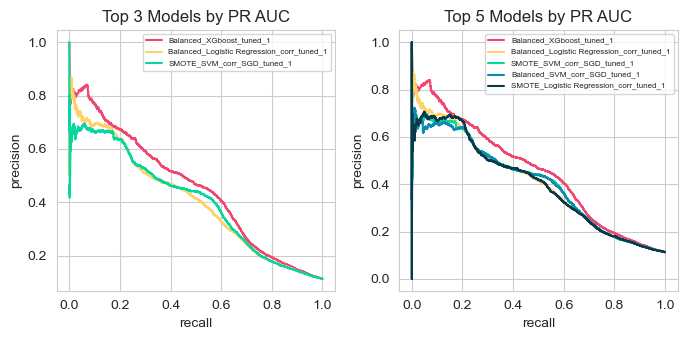

In [136]:
# make a grid
fig, ax = plt.subplots(1, 2, figsize=(7,3.5))

# Plot the top 3 models
for i, label_name in enumerate(PR_scores_t3_deploy_nl):
    ax[0].plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

ax[0].legend(loc='upper right', fontsize='xx-small')
ax[0].set_title('Top 3 Models by PR AUC')
ax[0].set_xlabel('recall')
ax[0].set_ylabel('precision')
ax[0].grid(True)

# plot the top 5 models
for i, label_name in enumerate(PR_scores_t5_deploy_nl):
    ax[1].plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

ax[1].legend(loc='upper right', fontsize='xx-small')
ax[1].set_title('Top 5 Models by PR AUC')
ax[1].set_xlabel('recall')
ax[1].set_ylabel('precision')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [153]:
# Create a copy of the list
pr_scores_f_1_sorted_deploy = copy.deepcopy(pr_scores_f_1_sorted)

# Rename the label name
# Create an empty list to save the renamed dictionaries
pr_scores_f_1_sorted_deploy_nl = []

for dic in pr_scores_f_1_sorted_deploy:
    if dic['label'][-3:] != 'f_1':
        dic['label'] = dic['label'] + '_tuned_1'
        pr_scores_f_1_sorted_deploy_nl.append(dic)
    
    else:
        pr_scores_f_1_sorted_deploy_nl.append(dic)

# Check the list
pr_scores_f_1_sorted_deploy_nl

[{'label': 'Balanced_XGboost_f_1',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.75510204, 0.8       ,
         1.        ]),
  'recall': array([1.        , 1.        , 1.        , ..., 0.01139163, 0.00492611,
         0.        ]),
  'auc': 0.45189812526090006,
  'best_f1': 0.4939149459372231,
  'best_threshold': 0.6083119},
 {'label': 'Balanced_XGboost_tuned_1',
  'precision': array([0.11265652, 0.11266042, 0.11262964, ..., 0.76923077, 0.77272727,
         1.        ]),
  'recall': array([1.        , 1.        , 0.99969212, ..., 0.00615764, 0.00523399,
         0.        ]),
  'auc': 0.45077108411981326,
  'best_f1': 0.4942996742178013,
  'best_threshold': 0.6007459},
 {'label': 'Balanced_Logistic Regression_corr_f_1',
  'precision': array([0.11265652, 0.11266042, 0.11266433, ..., 0.5       , 0.        ,
         1.        ]),
  'recall': array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         3.07881773e-04, 0.00000000e+00, 0.00000000e+00]),
  'auc': 

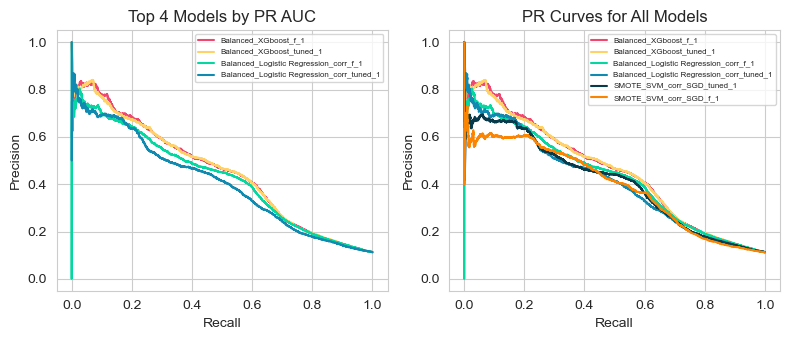

In [154]:
# Plot top 4 Pr curves and all the PR curve side by side
# Create subplots
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(8, 3.5))

# Plot top 4 models
for i, label_name in enumerate(pr_scores_f_1_sorted_deploy_nl[0:4]):
    ax[0].plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

ax[0].legend(loc='upper right', fontsize='xx-small')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('Top 4 Models by PR AUC')
ax[0].grid(True)

# Plot all the models
for i, label_name in enumerate(pr_scores_f_1_sorted_deploy_nl):
    ax[1].plot(label_name['recall'], label_name['precision'], label=label_name['label'], color=palette_3[i])

ax[1].legend(loc='upper right', fontsize='xx-small')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('PR Curves for All Models')
ax[1].grid(True)

plt.tight_layout()
plt.show()